Sebastián Castro Rodríguez  
03-05-2019  
Temas Alcaldia Mayor de Bogotá D.C.  
Periodo 2016-2019

El trabajo realizado en este notebook refleja un trabajo realizado a inicios de Mayo, a lo largo del mes se estuvieron realizando cambios en las paginas de la alcaldia mayor de Bogotá, por lo que los comandos de la busqueda ya no aplican para las paginas de noticias a fecha de 25 de Mayo. En esta misma linea, comento que las bases de datos adjuntas pueda que tengan problemas al cargarse por fuera de este notebook, sin embargo, aca se alcanzan a ver los datos en las tablas. Se quizo realizar el trabajo con un periodo de tiempo mayor pero el tiempo de carga de las noticias sobrepaso la capacidad del computador por lo cual no se pudo realizar este análisis. Se agradece la comprensión y  paciencia. 

In [401]:
# Requirements

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from collections import Counter
import unidecode
from itertools import permutations
import networkx as nx

In [320]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
import re
import string

In [73]:
def get_html(url):
    '''
    Requests url and parses text. Returns Beautiful Soup object.
    '''
    resp = requests.get(url).text
    return BeautifulSoup(resp,"lxml")

In [87]:
def get_links(soup, regex):
    '''
    Extracts url links to news. Returns a list of urls of news.
    '''
    links = soup.find_all('a')
    return re.findall(regex, str(links))

In [75]:
def links_news(main_urls, regex):
    '''
    Makes a list with the links to all news.
    '''
    news_urls = []
    for url in main_urls:
        soup = get_html(url)
        urls = get_links(soup, regex)
        news_urls = news_urls + urls
    return news_urls

In [76]:
def get_date(soup):
    '''
    Returns year, month, and day and hour from url
    '''
    date = re.findall('Fecha de publicación: (.+?)      \t\t\t\t\t\t\t\t', str(soup))[0]
    
    year = date[11:15]
    month = date[5:7]
    day = date[8:10]
    hour = date[18:]
    dayw = date[:3]
    dw = {'Lun':'Lunes','Mar':'Martes','Mié':'Miércoles','Jue':'Jueves','Vie':'Viernes','Sáb':'Sábado','Dom':'Domingo'}
    
    for i, j in dw.items():
        if dayw == i:
            dayw = j
    return year, month, day, hour, dayw

In [77]:
def get_title(soup):
    '''
    Returns title of new
    '''
    try:
        title = re.findall('<meta content="(.+?)" property="og:title"/>', str(soup))[0]
    except:
        title = re.findall('<meta content=\'(.+?)\' property="og:title"/>', str(soup))[0]
    return title

In [78]:
def get_new(soup):
    '''
    Returns text of new
    '''
    return str(soup.find_all('p'))

In [79]:
def remove_tags(text):
    '''
    Strips text from html and other tags
    '''
    return re.sub('<[^>]+>|\]|\[|\\u200b|\\n|\xa0', '', text)

In [80]:
def get_new_elements(new_url):
    '''
    Returns
    '''
    print('New url: ', new_url)
    soup = get_html(new_url)
    title = get_title(soup)
    year, month, day, hour, dayw = get_date(soup)
    new = remove_tags(get_new(soup))
    return [year, month, day, hour, dayw, title, new_url, new]

In [81]:
pags = range(1,115)

In [82]:
pags_gsc = []
for pag in pags:
    pags_gsc.append('/gobierno-seguridad-y-convivencia?page='+ str(pag) )
pags_gsc

['/gobierno-seguridad-y-convivencia?page=1',
 '/gobierno-seguridad-y-convivencia?page=2',
 '/gobierno-seguridad-y-convivencia?page=3',
 '/gobierno-seguridad-y-convivencia?page=4',
 '/gobierno-seguridad-y-convivencia?page=5',
 '/gobierno-seguridad-y-convivencia?page=6',
 '/gobierno-seguridad-y-convivencia?page=7',
 '/gobierno-seguridad-y-convivencia?page=8',
 '/gobierno-seguridad-y-convivencia?page=9',
 '/gobierno-seguridad-y-convivencia?page=10',
 '/gobierno-seguridad-y-convivencia?page=11',
 '/gobierno-seguridad-y-convivencia?page=12',
 '/gobierno-seguridad-y-convivencia?page=13',
 '/gobierno-seguridad-y-convivencia?page=14',
 '/gobierno-seguridad-y-convivencia?page=15',
 '/gobierno-seguridad-y-convivencia?page=16',
 '/gobierno-seguridad-y-convivencia?page=17',
 '/gobierno-seguridad-y-convivencia?page=18',
 '/gobierno-seguridad-y-convivencia?page=19',
 '/gobierno-seguridad-y-convivencia?page=20',
 '/gobierno-seguridad-y-convivencia?page=21',
 '/gobierno-seguridad-y-convivencia?page=22

In [83]:
# Generate list of main urls for batch 1, 
# by appending corresponding suffixes to root

main_urls1 = []
prefix = 'http://www.bogota.gov.co/temas-de-ciudad'
main_urls1.append(prefix +'/gobierno-seguridad-y-convivencia')
for suffix in pags_gsc:  # All pags
    main_urls1.append(prefix + suffix)
main_urls1

['http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=1',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=2',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=3',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=4',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=5',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=6',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=7',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=8',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=9',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convivencia?page=10',
 'http://www.bogota.gov.co/temas-de-ciudad/gobierno-seguridad-y-convive

In [ ]:
# Get part of urls of news
news_urls1 = links_news(main_urls1, \
    '"(/temas-de-ciudad/gobierno-seguridad-y-convivencia/.+?)"')
news_urls1 = list(dict.fromkeys(news_urls1))

In [ ]:
news_urls2 = links_news(main_urls1, \
    '"(/content/.+?)"')
news_urls2 = list(dict.fromkeys(news_urls2))

In [ ]:
news_urls3 = links_news(main_urls1, \
    '"(/article/.+?)"')
news_urls3 = list(dict.fromkeys(news_urls3))

In [ ]:
news_urls4 = links_news(main_urls1, \
    '"(/gobierno-seguridad-y-convivencia/.+?)"')
news_urls4 = list(dict.fromkeys(news_urls4))

In [ ]:
news_urls5 = links_news(main_urls1, \
    '"(/suba/.+?)"')
news_urls5 = list(dict.fromkeys(news_urls5))

In [ ]:
news_urls6 = links_news(main_urls1, \
    '"(/martires/.+?)"')
news_urls6 = list(dict.fromkeys(news_urls6))

In [ ]:
news_urls7 = links_news(main_urls1, \
    '"(/barrios-unidos/.+?)"')
news_urls7 = list(dict.fromkeys(news_urls7))

In [ ]:
news_urls8 = links_news(main_urls1, \
    '"(/santa-fe/.+?)"')
news_urls8 = list(dict.fromkeys(news_urls8))

In [ ]:
news_gsc1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1:  # All pags
    news_gsc1.append(prefix + str(new))

In [ ]:
news_gsc2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2:  # All pags
    news_gsc2.append(prefix + str(new))

In [ ]:
news_gsc3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3:  # All pags
    news_gsc3.append(prefix + str(new))

In [ ]:
news_gsc4 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls4:  # All pags
    news_gsc4.append(prefix + str(new))

In [ ]:
news_gsc5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5:  # All pags
    news_gsc5.append(prefix + str(new))

In [ ]:
news_gsc6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6:  # All pags
    news_gsc6.append(prefix + str(new))

In [ ]:
news_gsc7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7:  # All pags
    news_gsc7.append(prefix + str(new))

In [ ]:
news_gsc8 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls8:  # All pags
    news_gsc8.append(prefix + str(new))

In [ ]:
news_gsc = []
for new in news_gsc1:
    news_gsc.append(new)
for new in news_gsc2:
    news_gsc.append(new)
for new in news_gsc3:
    news_gsc.append(new)
for new in news_gsc4:
    news_gsc.append(new)
for new in news_gsc5:
    news_gsc.append(new)
for new in news_gsc6:
    news_gsc.append(new)
for new in news_gsc7:
    news_gsc.append(new)
for new in news_gsc8:
    news_gsc.append(new)
news_gsc

In [ ]:
# Apply function to extract news elements, to all urls

corpus1 = list(map(get_new_elements, news_gsc))

In [ ]:
corpus1_df = pd.DataFrame(corpus1, \
    columns = ["Year", "Month", "Day", "Hour", "Day of the Week", "Title", "URL", "New"])

In [ ]:
# Export to pickle file
corpus1_df.to_pickle('news_df_batch1.pkl')

In [95]:
batch1 = pd.read_pickle('news_df_batch1.pkl')
batch1

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,03,13:08,Viernes,Policía desmantela banda de ‘Los Paísanos’ en ...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, El alcalde Enrique Peñalos..."
1,2019,05,03,07:29,Viernes,Teusaquillo más segura con 22 nuevas motos que...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, A partir de hoy los 27 bar..."
2,2019,04,30,18:43,Martes,Alcaldía de Bogotá invita a la ciudadanía a ma...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Este miércoles primero de ..."
3,2019,04,25,20:01,Jueves,“Condenamos a la minoría que cometió actos van...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Durante una rueda de prens..."
4,2019,04,24,19:40,Miércoles,Distrito tiene listas medidas para la jornada ...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Cerca de 150 gestores de c..."
5,2019,04,11,11:42,Jueves,Alcaldía Peñalosa tiene todo listo para la con...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, La Alcaldía de Enrique Peñ..."
6,2019,04,09,17:03,Martes,El Bogotazo: un día que transformó a una ciudad,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, La Carrera Séptima con Ave..."
7,2019,04,09,09:02,Martes,Lucha frontal contra el hurto en Bogotá: más d...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Desde la Plaza España, el ..."
8,2019,04,08,14:54,Lunes,"Por una mejor convivencia en Bogotá, Distrito ...",http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Incrementar la tolerancia ..."
9,2019,04,05,11:57,Viernes,Con nuevo parque automotor y 1.500 policías má...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, El alcalde Enrique Peñalos..."


## Batch 2 Movilidad

In [ ]:
pagsm = range(1,154)

In [ ]:
pags_m = []
for pag in pagsm:
    pags_m.append('/movilidad?page='+ str(pag) )
pags_m

In [ ]:
# Generate list of main urls for batch 1, 
# by appending corresponding suffixes to root

main_urls2 = []
prefix = 'http://www.bogota.gov.co/temas-de-ciudad'
main_urls2.append(prefix +'/movilidad')
for suffix in pags_m:  # All pags
    main_urls2.append(prefix + suffix)
main_urls2

In [ ]:
# Get part of urls of news
news_urls1m = links_news(main_urls2, \
    '"(/temas-de-ciudad/movilidad/.+?)"')
news_urls1m = list(dict.fromkeys(news_urls1m))

In [ ]:
news_urls2m = links_news(main_urls2, \
    '"(/content/.+?)"')
news_urls2m = list(dict.fromkeys(news_urls2m))

In [ ]:
news_urls3m = links_news(main_urls2, \
    '"(/article/.+?)"')
news_urls3m = list(dict.fromkeys(news_urls3m))

In [ ]:
news_urls4m = links_news(main_urls2, \
    '"(/movilidad/.+?)"')
news_urls4m = list(dict.fromkeys(news_urls4m))

In [ ]:
news_urls5m = links_news(main_urls2, \
    '"(/chapinero/.+?)"')
news_urls5m = list(dict.fromkeys(news_urls5m))

In [ ]:
news_urls6m = links_news(main_urls2, \
    '"(/antonio-narino/.+?)"')
news_urls6m = list(dict.fromkeys(news_urls6m))

In [ ]:
news_urls7m = links_news(main_urls2, \
    '"(/bosa/.+?)"')
news_urls7m = list(dict.fromkeys(news_urls7m))

In [ ]:
news_urls8m = links_news(main_urls2, \
    '"(/ciudad/temas-de-ciudad/.+?)"')
news_urls8m = list(dict.fromkeys(news_urls8m))

In [ ]:
news_urls9m = links_news(main_urls2, \
    '"(/ciudad-bolivar/.+?)"')
news_urls9m = list(dict.fromkeys(news_urls9m))

In [ ]:
news_urls10m = links_news(main_urls2, \
    '"(/usaquen/.+?)"')
news_urls10m = list(dict.fromkeys(news_urls10m))

In [ ]:
news_urls11m = links_news(main_urls2, \
    '"(/kennedy/.+?)"')
news_urls11m = list(dict.fromkeys(news_urls11m))

In [ ]:
news_urls12m = links_news(main_urls2, \
    '"(/fontibon/.+?)"')
news_urls12m = list(dict.fromkeys(news_urls12m))

In [ ]:
news_urls13m = links_news(main_urls2, \
    '"(/engativa/.+?)"')
news_urls13m = list(dict.fromkeys(news_urls13m))

In [ ]:
news_m1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1m:  # All pags
    news_m1.append(prefix + str(new))

In [ ]:
news_m2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2m:  # All pags
    news_m2.append(prefix + str(new))

In [ ]:
news_m3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3m:  # All pags
    news_m3.append(prefix + str(new))

In [ ]:
news_m4 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls4m:  # All pags
    news_m4.append(prefix + str(new))

In [ ]:
news_m5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5m:  # All pags
    news_m5.append(prefix + str(new))

In [ ]:
news_m6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6m:  # All pags
    news_m6.append(prefix + str(new))

In [ ]:
news_m7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7m:  # All pags
    news_m7.append(prefix + str(new))

In [ ]:
news_m8 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls8m:  # All pags
    news_m8.append(prefix + str(new))

In [ ]:
news_m9 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls9m:  # All pags
    news_m9.append(prefix + str(new))

In [ ]:
news_m10 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls10m:  # All pags
    news_m10.append(prefix + str(new))

In [ ]:
news_m11 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls11m:  # All pags
    news_m11.append(prefix + str(new))

In [ ]:
news_m12 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls12m:  # All pags
    news_m12.append(prefix + str(new))

In [ ]:
news_m13 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls13m:  # All pags
    news_m13.append(prefix + str(new))

In [ ]:
news_m = []
for new in news_m1:
    news_m.append(new)
for new in news_m2:
    news_m.append(new)
for new in news_m3:
    news_m.append(new)
for new in news_m4:
    news_m.append(new)
for new in news_m5:
    news_m.append(new)
for new in news_m6:
    news_m.append(new)
for new in news_m7:
    news_m.append(new)
for new in news_m8:
    news_m.append(new)
for new in news_m9:
    news_m.append(new)
for new in news_m10:
    news_m.append(new)
for new in news_m11:
    news_m.append(new)
for new in news_m12:
    news_m.append(new)
for new in news_m13:
    news_m.append(new)
news_m

In [ ]:
corpus2 = list(map(get_new_elements, news_m))

In [ ]:
corpus2_df = pd.DataFrame(corpus2, \
    columns = ["Year", "Month", "Day", "Hour", "Day of the Week", "Title", "URL", "New"])

In [ ]:
# Export to pickle file
corpus2_df.to_pickle('news_df_batch2.pkl')

In [96]:
batch2 = pd.read_pickle('news_df_batch2.pkl')
batch2

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,04,08:41,Sábado,TransMilenio inicia cambios operativos por lle...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, Por la entrada en operació..."
1,2019,05,03,16:26,Viernes,Con ‘TransMiChiquis’ más de 15 mil niños han a...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, Saber cómo funciona TransM..."
2,2019,05,03,12:08,Viernes,Cámara Colombiana de la Infraestructura califi...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, La Cámara Colombiana de la..."
3,2019,05,03,11:17,Viernes,Conozca la Defensoría del Usuario de TransMilenio,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, ¿Sabía que TransMilenio cu..."
4,2019,05,03,07:51,Viernes,"Llegó 'Peatona', la nueva integrante de los se...",http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, De ahora en adelante, cuan..."
5,2019,05,02,16:16,Jueves,Por operar sin tarjeta de control vigente se h...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, La Policía de Tránsito de ..."
6,2019,05,02,11:38,Jueves,Secretaría Distrital de Movilidad certifica su...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, La Secretaría Distrital de..."
7,2019,05,02,06:29,Jueves,“Avanzan las obras de traslado de redes que se...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, A lo largo de los 24 kilóm..."
8,2019,04,29,13:28,Lunes,Conozca las actividades que se llevaron a cabo...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, Este 30 de abril culmina e..."
9,2019,04,24,08:41,Miércoles,IDU suspende licitación de TransMilenio por la...,http://www.bogota.gov.co/temas-de-ciudad/movil...,"Secretaría General, Ante la solicitud de suspe..."


In [85]:
## Batch 3 Integración Social

pagsis = range(1,41)

pags_is = []
for pag in pagsis:
    pags_is.append('/integracion-social?page='+ str(pag) )

# Generate list of main urls for batch 1, 
# by appending corresponding suffixes to root

main_urls3 = []
prefix = 'http://www.bogota.gov.co/temas-de-ciudad'
main_urls3.append(prefix +'/integracion-social')
for suffix in pags_is:  # All pags
    main_urls3.append(prefix + suffix)
main_urls3

['http://www.bogota.gov.co/temas-de-ciudad/integracion-social',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=1',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=2',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=3',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=4',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=5',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=6',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=7',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=8',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=9',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=10',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=11',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=12',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social?page=13',
 'http://

In [88]:
# Get part of urls of news
news_urls1is = links_news(main_urls3,'"(/temas-de-ciudad/integracion-social/.+?)"')
news_urls1is = list(dict.fromkeys(news_urls1is))

news_urls2is = links_news(main_urls3,'"(/content/.+?)"')
news_urls2is = list(dict.fromkeys(news_urls2is))

news_urls3is = links_news(main_urls3,'"(/article/.+?)"')
news_urls3is = list(dict.fromkeys(news_urls3is))

news_urls5is = links_news(main_urls3,'"(/chapinero/.+?)"')
news_urls5is = list(dict.fromkeys(news_urls5is))

news_urls6is = links_news(main_urls3,'"(/antonio-narino/.+?)"')
news_urls6is = list(dict.fromkeys(news_urls6is))

news_urls7is = links_news(main_urls3,'"(/bosa/.+?)"')
news_urls7is = list(dict.fromkeys(news_urls7is))

news_urls8is = links_news(main_urls3,'"(/ciudad/temas-de-ciudad/.+?)"')
news_urls8is = list(dict.fromkeys(news_urls8is))

news_urls9is = links_news(main_urls3,'"(/ciudad-bolivar/.+?)"')
news_urls9is = list(dict.fromkeys(news_urls9is))

news_urls10is = links_news(main_urls3,'"(/usaquen/.+?)"')
news_urls10is = list(dict.fromkeys(news_urls10is))

news_urls11is = links_news(main_urls3,'"(/kennedy/.+?)"')
news_urls11is = list(dict.fromkeys(news_urls11is))

news_urls12is = links_news(main_urls3,'"(/fontibon/.+?)"')
news_urls12is = list(dict.fromkeys(news_urls12is))

news_urls13is = links_news(main_urls3,'"(/engativa/.+?)"')
news_urls13is = list(dict.fromkeys(news_urls13is))

news_is1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1is:  # All pags
    news_is1.append(prefix + str(new))

news_is2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2is:  # All pags
    news_is2.append(prefix + str(new))

news_is3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3is:  # All pags
    news_is3.append(prefix + str(new))

news_is5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5is:  # All pags
    news_is5.append(prefix + str(new))

news_is6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6is:  # All pags
    news_is6.append(prefix + str(new))

news_is7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7is:  # All pags
    news_is7.append(prefix + str(new))

news_is8 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls8is:  # All pags
    news_is8.append(prefix + str(new))

news_is9 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls9is:  # All pags
    news_is9.append(prefix + str(new))

news_is10 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls10is:  # All pags
    news_is10.append(prefix + str(new))

news_is11 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls11is:  # All pags
    news_is11.append(prefix + str(new))

news_is12 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls12is:  # All pags
    news_is12.append(prefix + str(new))

news_is13 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls13is:  # All pags
    news_is13.append(prefix + str(new))

news_is = []
for new in news_is1:
    news_is.append(new)
for new in news_is2:
    news_is.append(new)
for new in news_is3:
    news_is.append(new)
for new in news_is5:
    news_is.append(new)
for new in news_is6:
    news_is.append(new)
for new in news_is7:
    news_is.append(new)
for new in news_is8:
    news_is.append(new)
for new in news_is9:
    news_is.append(new)
for new in news_is10:
    news_is.append(new)
for new in news_is11:
    news_is.append(new)
for new in news_is12:
    news_is.append(new)
for new in news_is13:
    news_is.append(new)
news_is

['http://www.bogota.gov.co/temas-de-ciudad/integracion-social/dia-de-la-familia-1',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/reduccion-de-la-pobreza-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/fuera-de-peligro-bebe-venezolana-con-cardiopatia-y-sindrome-de-down',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-a-venezolanos-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-adultos-mayores-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/cuales-son-las-senales-para-saber-si-un-nino-es-victima-de-abuso',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-para-habitantes-de-calle-por-ola-invernal',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/inicia-busqueda-25000-nuevos-hogares-mas-vulnerables',
 'http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-a-ninos-y-ninas-en-bogota',
 'http://www.bogota.gov.co/temas-

In [89]:
len(news_is)

233

In [90]:
corpus3 = list(map(get_new_elements, news_is))

New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/dia-de-la-familia-1
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/reduccion-de-la-pobreza-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/fuera-de-peligro-bebe-venezolana-con-cardiopatia-y-sindrome-de-down
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-a-venezolanos-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-adultos-mayores-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/cuales-son-las-senales-para-saber-si-un-nino-es-victima-de-abuso
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-para-habitantes-de-calle-por-ola-invernal
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/inicia-busqueda-25000-nuevos-hogares-mas-vulnerables
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/atencion-a-nin

New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/centros-dia-para-personas-mayores-ahora-los-sabados
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/cupos-disponibles-en-los-jardines-infantiles-del-distrito
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/secretaria-de-integracion-social-tiene-nueva-secretaria
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/alcalde-penalosa-entrega-dos-jardines-infantiles-renovados
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/gracias-a-la-disminucion-de-embarazos-a-temprana-edad-profamilia-exalta-al-distrito
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/maternidad-adolescente-en-bogota-disminuyo-en-1295-en-el-ultimo-ano
New url:  http://www.bogota.gov.co/temas-de-ciudad/integracion-social/beneficiarios-del-idipron-hacen-realidad-su-sueno-de-montar-en-avion-por-primera-vez
New url:  http://www.bogota.gov.co/temas-de-ciud

New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/con-fuerza-de-voluntad-todo-se-puede-lograr
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/penalosa-asegura-que-con-los-habitantes-de-la-calle-todos-estamos-del-mismo-lado
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/penalosa-aumento-la-inversion-para-la-tercera-edad-en-229000-millones-de-pesos
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/alcaldia-de-bogota-no-esta-enviando-habitantes-de-calle-a-otras-ciudades-del-pais
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/alcaldia-de-bogota-ha-atendido-mas-de-10000-habitantes-de-calle-en-2016
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/penalosa-anuncio-recursos-por-160000-millones-de-pesos-para-atender-habitantes-de-calle
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/integracion-social/alcaldia

New url:  http://www.bogota.gov.co/article/temas-de-ciudad/integracion-social/ex-habitantes-de-calle-finalizan-su-proceso-de-recuperacion-con-un-reencuentro-familiar
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/integracion-social/comerciantes-y-habitantes-del-centro-de-bogota-hacen-reconocimiento-a-ex-habitantes-de-calle
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/desarrollo-economico/integracion-social/administracion-penalosa-brinda-mas-oportunidades-a-vendedores-informales
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/integracion-social/ayudemos-de-verdad-campana-de-corresponsabilidad-con-los-habitantes-de-calle
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/integracion-social/planes-para-hacer-en-el-mes-del-adulto-mayor-en-bogota
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/integracion-social/universidades-ayudaran-a-descongestionar-comisarias-de-familia-de-bogota
New url:  http://www.bogota.gov.co/article/temas-de-

In [91]:
corpus3_df = pd.DataFrame(corpus3, columns = ["Year", "Month", "Day", "Hour", "Day of the Week", "Title", "URL", "New"])

In [92]:
# Export to pickle file
corpus3_df.to_pickle('news_df_batch3.pkl')

In [93]:
batch3 = pd.read_pickle('news_df_batch3.pkl')
batch3

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,06,15:07,Lunes,Bogotá celebrará el Día de la Familia este 15 ...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, Todos los ciudadanos en Bo..."
1,2019,05,03,14:56,Viernes,En Bogotá cae la pobreza multidimensional en 1...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, El DANE informó que la pob..."
2,2019,05,03,11:34,Viernes,"Fuera de peligro bebé venezolana, diagnosticad...",http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, En el Hospital Simón Bolív..."
3,2019,05,03,09:47,Viernes,Más de 4.000 personas fueron atendidas en el C...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, La apertura del Centro Int..."
4,2019,04,19,08:21,Viernes,Más de 140.000 adultos mayores hoy son más fel...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, En Bogotá los adultos mayo..."
5,2019,04,08,15:41,Lunes,Estas señales le pueden decir si un niño es ví...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, Si estamos atentos, todos ..."
6,2019,04,03,12:50,Miércoles,Fortalecen atención para habitantes de calle p...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, La Alcaldía de Bogotá está..."
7,2019,03,27,10:28,Miércoles,Alcaldía de Bogotá refuerza estrategia contra ...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, La Alcaldía de Enrique Peñ..."
8,2019,03,22,16:59,Viernes,Alcaldía lanza campaña ‘Ojo con los niños’ par...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, Con el lanzamiento de la c..."
9,2019,03,21,14:52,Jueves,Habitantes y ex habitantes de calle le ponen ‘...,http://www.bogota.gov.co/temas-de-ciudad/integ...,"Secretaría General, En el evento ‘Chef al parc..."


In [192]:
## Batch 4 Hacienda

pagsh = range(1,27)

pags_h = []
for pag in pagsh:
    pags_h.append('/hacienda?page='+ str(pag) )

# Generate list of main urls for batch 1, 
# by appending corresponding suffixes to root

main_urls4 = []
prefix = 'http://www.bogota.gov.co/temas-de-ciudad'
main_urls4.append(prefix +'/hacienda')
for suffix in pags_h:  # All pags
    main_urls4.append(prefix + suffix)

# Get part of urls of news
news_urls1h = links_news(main_urls4,'"(/temas-de-ciudad/hacienda/.+?)"')
news_urls1h = list(dict.fromkeys(news_urls1h))

news_urls2h = links_news(main_urls4,'"(/content/.+?)"')
news_urls2h = list(dict.fromkeys(news_urls2h))

news_urls3h = links_news(main_urls4,'"(/article/.+?)"')
news_urls3h = list(dict.fromkeys(news_urls3h))

news_urls5h = links_news(main_urls4,'"(/chapinero/.+?)"')
news_urls5h = list(dict.fromkeys(news_urls5h))

news_urls6h = links_news(main_urls4,'"(/antonio-narino/.+?)"')
news_urls6h = list(dict.fromkeys(news_urls6h))

news_urls7h = links_news(main_urls4,'"(/bosa/.+?)"')
news_urls7h = list(dict.fromkeys(news_urls7h))

news_urls8h = links_news(main_urls4,'"(/ciudad/temas-de-ciudad/.+?)"')
news_urls8h = list(dict.fromkeys(news_urls8h))

news_urls9h = links_news(main_urls4,'"(/ciudad-bolivar/.+?)"')
news_urls9h = list(dict.fromkeys(news_urls9h))

news_urls10h = links_news(main_urls4,'"(/usaquen/.+?)"')
news_urls10h = list(dict.fromkeys(news_urls10h))

news_urls11h = links_news(main_urls4,'"(/kennedy/.+?)"')
news_urls11h = list(dict.fromkeys(news_urls11h))

news_urls12h = links_news(main_urls4,'"(/fontibon/.+?)"')
news_urls12h = list(dict.fromkeys(news_urls12h))

news_urls13h = links_news(main_urls4,'"(/engativa/.+?)"')
news_urls13h = list(dict.fromkeys(news_urls13h))

news_h1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1h:  # All pags
    news_h1.append(prefix + str(new))

news_h2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2h:  # All pags
    news_h2.append(prefix + str(new))

news_h3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3h:  # All pags
    news_h3.append(prefix + str(new))

news_h5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5h:  # All pags
    news_h5.append(prefix + str(new))

news_h6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6h:  # All pags
    news_h6.append(prefix + str(new))

news_h7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7h:  # All pags
    news_h7.append(prefix + str(new))

news_h8 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls8h:  # All pags
    news_h8.append(prefix + str(new))

news_h9 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls9h:  # All pags
    news_h9.append(prefix + str(new))

news_h10 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls10h:  # All pags
    news_h10.append(prefix + str(new))

news_h11 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls11h:  # All pags
    news_h11.append(prefix + str(new))

news_h12 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls12h:  # All pags
    news_h12.append(prefix + str(new))

news_h13 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls13h:  # All pags
    news_h13.append(prefix + str(new))

news_h = []
for new in news_h1:
    news_h.append(new)
for new in news_h2:
    news_h.append(new)
for new in news_h3:
    news_h.append(new)
for new in news_h5:
    news_h.append(new)
for new in news_h6:
    news_h.append(new)
for new in news_h7:
    news_h.append(new)
for new in news_h8:
    news_h.append(new)
for new in news_h9:
    news_h.append(new)
for new in news_h10:
    news_h.append(new)
for new in news_h11:
    news_h.append(new)
for new in news_h12:
    news_h.append(new)
for new in news_h13:
    news_h.append(new)
news_h

['http://www.bogota.gov.co/temas-de-ciudad/hacienda/descuento-en-intereses-y-sanciones-para-contribuyentes-morosos',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/asi-va-el-recaudo-de-impuestos-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/10-por-ciento-de-descuento-en-el-impuesto-de-vehiculos',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/vence-plazo-para-pagar-predial-con-10-de-descuento',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/pago-de-impuesto-predial-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/vence-plazo-para-acogerse-al-pago-del-predial-por-cuotas',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/contribuyentes-atendidos-en-centro-comerciales',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/utilidades-de-la-etb',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/atencion-a-contribuyentes-en-centros-comerciales',
 'http://www.bogota.gov.co/temas-de-ciudad/hacienda/plazo-para-pagar-ica-y-reteica',
 'http://w

In [193]:
len(news_h)

153

In [194]:
corpus4 = list(map(get_new_elements, news_h))

New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/descuento-en-intereses-y-sanciones-para-contribuyentes-morosos
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/asi-va-el-recaudo-de-impuestos-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/10-por-ciento-de-descuento-en-el-impuesto-de-vehiculos
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/vence-plazo-para-pagar-predial-con-10-de-descuento
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/pago-de-impuesto-predial-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/vence-plazo-para-acogerse-al-pago-del-predial-por-cuotas
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/contribuyentes-atendidos-en-centro-comerciales
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/utilidades-de-la-etb
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/atencion-a-contribuyentes-en-centros-comerciales
New url:  http://www.bogota.gov.co/temas-

New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/impuesto-predial-este-viernes-vence-plazo-para-pagar-tercera-cuota
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/calificacion-aaa-a-finanzas-de-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/recaudo-de-impuestos-en-bogota-en-2017
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/predial-por-cuotas-uno-de-cada-cinco-ciudadanos-no-ha-pagado-puntual
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/administracion-distrital-solicita-nuevo-cupo-de-endeudamiento
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/grupo-rit-de-la-secretaria-de-hacienda
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/declaracion-de-renta-2017-sepa-si-usted-le-toca
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/beneficios-tributarios-para-los-bogotanos
New url:  http://www.bogota.gov.co/temas-de-ciudad/hacienda/ica-hasta-este-viernes-se-puede-pagar
New url:  http://w

New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/el-viernes-se-vence-el-ultimo-plazo-para-pagar-el-predial
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/este-atento-mas-de-1500-predios-seran-censados-en-bosa-y-ciudad-bolivar
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/recaudo-de-impuestos-en-bogota-aumento-en-11-por-ciento
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/aumenta-aporte-voluntario-en-2016
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/hacienda/con-impuestos-de-losciudadanos-rio-bogota-pasara-a-ser-un-eje-ecoambiental
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/77-%25-de-los-contribuyentes-le-cumplieron-anticipadamente-a-bogota-con-el-predial
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/los-bogotanos-han-pagado-a-tiempo-el-impuesto-predial
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/hacienda/con-nueva-geren

In [195]:
corpus4_df = pd.DataFrame(corpus4, columns = ["Year", "Month", "Day", "Hour", "Day of the Week", "Title", "URL", "New"])

In [196]:
# Export to pickle file
corpus4_df.to_pickle('news_df_batch4.pkl')

In [197]:
batch4 = pd.read_pickle('news_df_batch4.pkl')
batch4

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,09,16:04,Jueves,¿Es usted un deudor moroso? Aquí le contamos c...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Alrededor de 780.000 contr..."
1,2019,05,09,15:51,Jueves,¿Cómo va el recaudo de impuestos 2019 en Bogotá?,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Durante los cuatro primero..."
2,2019,04,29,14:48,Lunes,Pague el Impuesto de Vehículos hasta el 3 de m...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Los contribuyentes que est..."
3,2019,04,05,09:21,Viernes,Hoy vence el plazo para obtener 10 % de descue...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Este viernes 5 de abril se..."
4,2019,04,02,07:38,Martes,900.000 predios de Bogotá ya pagaron su impues...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Los beneficios otorgados p..."
5,2019,03,28,08:36,Jueves,Este viernes vence el plazo para acogerse al p...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Hasta la medianoche de est..."
6,2019,03,27,14:48,Miércoles,Más de 1.100 contribuyentes han sido atendidos...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, La Dirección de Impuestos ..."
7,2019,03,22,15:25,Viernes,Utilidades de la ETB en 2018: 42.000 millones ...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Por primera vez en cuatro ..."
8,2019,03,21,16:02,Jueves,Dirección de Impuestos de Bogotá atiende en ce...,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Para responder al mayor nú..."
9,2019,03,20,07:52,Miércoles,Hoy vence plazo para pagar ICA y ReteICA,http://www.bogota.gov.co/temas-de-ciudad/hacie...,"Secretaría General, Luego de verificar el corr..."


In [198]:
# Hábitat

pagsha = range(1,51)

pags_ha = []
for pag in pagsha:
    pags_ha.append('/habitat?page='+ str(pag) )

# Generate list of main urls for batch 1, 
# by appending corresponding suffixes to root

main_urls5 = []
prefix = 'http://www.bogota.gov.co/temas-de-ciudad'
main_urls5.append(prefix +'/habitat')
for suffix in pags_ha:  # All pags
    main_urls5.append(prefix + suffix)

# Get part of urls of news
news_urls1ha = links_news(main_urls5,'"(/temas-de-ciudad/habitat/.+?)"')
news_urls1ha = list(dict.fromkeys(news_urls1ha))

news_urls2ha = links_news(main_urls5,'"(/content/.+?)"')
news_urls2ha = list(dict.fromkeys(news_urls2ha))

news_urls3ha = links_news(main_urls5,'"(/article/.+?)"')
news_urls3ha = list(dict.fromkeys(news_urls3ha))

news_urls5ha = links_news(main_urls5,'"(/chapinero/.+?)"')
news_urls5ha = list(dict.fromkeys(news_urls5ha))

news_urls6ha = links_news(main_urls5,'"(/antonio-narino/.+?)"')
news_urls6ha = list(dict.fromkeys(news_urls6ha))

news_urls7ha = links_news(main_urls5,'"(/bosa/.+?)"')
news_urls7ha = list(dict.fromkeys(news_urls7ha))

news_urls8ha = links_news(main_urls5,'"(/ciudad/temas-de-ciudad/.+?)"')
news_urls8ha = list(dict.fromkeys(news_urls8ha))

news_urls9ha = links_news(main_urls5,'"(/ciudad-bolivar/.+?)"')
news_urls9ha = list(dict.fromkeys(news_urls9ha))

news_urls10ha = links_news(main_urls5,'"(/usaquen/.+?)"')
news_urls10ha = list(dict.fromkeys(news_urls10ha))

news_urls11ha = links_news(main_urls5,'"(/kennedy/.+?)"')
news_urls11ha = list(dict.fromkeys(news_urls11ha))

news_urls12ha = links_news(main_urls5,'"(/fontibon/.+?)"')
news_urls12ha = list(dict.fromkeys(news_urls12ha))

news_urls13ha = links_news(main_urls5,'"(/engativa/.+?)"')
news_urls13ha = list(dict.fromkeys(news_urls13ha))

news_ha1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1ha:  # All pags
    news_ha1.append(prefix + str(new))

news_ha2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2ha:  # All pags
    news_ha2.append(prefix + str(new))

news_ha3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3ha:  # All pags
    news_ha3.append(prefix + str(new))

news_ha5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5ha:  # All pags
    news_ha5.append(prefix + str(new))

news_ha6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6ha:  # All pags
    news_ha6.append(prefix + str(new))

news_ha7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7ha:  # All pags
    news_ha7.append(prefix + str(new))

news_ha8 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls8ha:  # All pags
    news_ha8.append(prefix + str(new))

news_ha9 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls9ha:  # All pags
    news_ha9.append(prefix + str(new))

news_ha10 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls10ha:  # All pags
    news_ha10.append(prefix + str(new))

news_ha11 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls11ha:  # All pags
    news_ha11.append(prefix + str(new))

news_ha12 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls12ha:  # All pags
    news_ha12.append(prefix + str(new))

news_ha13 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls13ha:  # All pags
    news_ha13.append(prefix + str(new))

news_ha = []
for new in news_ha1:
    news_ha.append(new)
for new in news_ha2:
    news_ha.append(new)
for new in news_ha3:
    news_ha.append(new)
for new in news_ha5:
    news_ha.append(new)
for new in news_ha6:
    news_ha.append(new)
for new in news_ha7:
    news_ha.append(new)
for new in news_ha8:
    news_ha.append(new)
for new in news_ha9:
    news_ha.append(new)
for new in news_ha10:
    news_ha.append(new)
for new in news_ha11:
    news_ha.append(new)
for new in news_ha12:
    news_ha.append(new)
for new in news_ha13:
    news_ha.append(new)
news_ha

['http://www.bogota.gov.co/temas-de-ciudad/habitat/habilitacion-de-suelo-para-vivienda-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/habitarte-transforma-los-barrios-vulnerables-de-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/mejoramientos-de-vivienda-en-bogota-2019',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/obras-de-tanques-el-consuelo-y-san-dionisio',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/incineracion-de-basuras-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/vigencias-futuras-para-la-ptar-canoas',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/descontaminacion-de-rios-en-bogota-tunjuelo',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/dia-mundial-del-reciclador-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/contenedores-soterrados-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/habitat/jornada-voluntaria-de-embellecimiento-en-la-mariposa-en-usaquen',
 'http://www.bogota.gov.co/temas-

In [199]:
len(news_ha)

289

In [200]:
corpus5 = list(map(get_new_elements, news_ha))

New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/habilitacion-de-suelo-para-vivienda-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/habitarte-transforma-los-barrios-vulnerables-de-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/mejoramientos-de-vivienda-en-bogota-2019
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/obras-de-tanques-el-consuelo-y-san-dionisio
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/incineracion-de-basuras-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/vigencias-futuras-para-la-ptar-canoas
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/descontaminacion-de-rios-en-bogota-tunjuelo
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/dia-mundial-del-reciclador-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/contenedores-soterrados-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/jornada-voluntaria-de-embellecimiento

New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/transformacion-de-barrios-se-podra-consultar-en-plaforma-virtual
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/cortes-de-agua-8
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/la-nueva-bogota-cierra-el-ano-con-64000-fachadas-intervenidas
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/hijos-de-recicladores-de-oficio-se-beneficiaron-de-jornadas-recreativas
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/cementerios-distritales-brindan-asesoria-psicologica-y-legal-gratuita
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/cortes-de-agua-7
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/para-recicladores-de-oficio-el-distrito-tiene-oferta-institucional
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/casa-propia-el-distrito-le-ayuda-a-obtenerla
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/gobiernos-nacional-y-distrital-entregan-400-viviendas-

New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/asi-va-el-plan-de-renovacion-para-la-antigua-calle-del-bronx
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/recomendaciones-para-evitar-emergencias-electricas
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/en-san-cristobal-se-construye-complejo-habitacional-mas-grande-de-bogota-para-familia
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/unas-10000-fachadas-de-viviendas-seran-mejoradas-este-ano
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/vendedores-de-vivienda-a-presentar-estados-financieros
New url:  http://www.bogota.gov.co/temas-de-ciudad/habitat/crecen-en-225-licencias-para-vivienda-para-los-mas-pobres-en-bogota
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/habitat/distrito-recupero-zona-infestada-de-basuras-en-las-cruces
New url:  http://www.bogota.gov.co/content/temas-de-ciudad/habitat/reactivamos-vivienda-de-interes-social-y-prioritario
New url:  http://www.b

New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/aprenda-todo-sobre-vivienda-gratuita-y-subsidiada
New url:  http://www.bogota.gov.co/article/habitat/en-sumapaz-759-personas-ahora-cuentan-con-una-concesion-que-les-permite-abastecerse-de-agua-potable
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/planeacion/avanza-la-legalizacion-de-barrios-en-cinco-localidades-de%20-bogota
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/nuevos-puentes-para-caminantes-de-la-quebrada-la-vieja
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/alcaldia-de-bogota-busca-3300-viviendas-para-remodelarlas
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/planeacion/hacienda/no-esta-deaacuerdo-con-la-estratificaci%C3%B3n-de-su-vivienda
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/alcaldia-de-bogota-remodelara-viviendas-de-1000-familias-en-ciudad-bolivar
New url:  http://www.bogota.gov.co/article/temas-de-ciud

New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/desarrollo-economico/beneficios-fibra-optica
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/gran-mina-de-aluminio-que-hay-en-dona-juana
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/legalizacion-predial-ciudad-bolivar
New url:  http://www.bogota.gov.co/article/temasdeciudad/habitat/guia-atencion-incluyente
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/ambiente/conozca-claves-para-ahorrar-energia
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/habitat/en-47-barrios-de-ciudad-bolivar-no-habra-agua
New url:  http://www.bogota.gov.co/article/etb-garantiza-identidad-de-su-personal-t%C3%A9cnico
New url:  http://www.bogota.gov.co/article/temasdeciudad/habitat/revisi%C3%B3n%20gasodomesticos
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/la-nacion-y-el-distrito-construir%C3%A1n-30000-viviendas-nuevas-en-bogota
New url:  http://w

In [201]:
corpus5_df = pd.DataFrame(corpus5, columns = ["Year", "Month", "Day", "Hour", "Day of the Week", "Title", "URL", "New"])

In [202]:
# Export to pickle file
corpus5_df.to_pickle('news_df_batch5.pkl')

In [203]:
batch5 = pd.read_pickle('news_df_batch5.pkl')
batch5

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,07,14:21,Martes,Estamos habilitando el suelo necesario para qu...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, El alcalde Enrique Peñalos..."
1,2019,04,20,06:55,Sábado,Con ‘Habitarte’ Alcaldía Peñalosa ha transform...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, A simple vista la estrateg..."
2,2019,04,18,07:42,Jueves,Alcaldía Peñalosa hará 1300 mejoramientos de v...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, Este año la Alcaldía de En..."
3,2019,04,02,11:03,Martes,Obras de tanques en el suroriente aumentarán a...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, Desde la localidad de San ..."
4,2019,03,13,16:01,Miércoles,Estas tres alternativas optimizarían la dispos...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, El Distrito está contempla..."
5,2019,03,12,12:10,Martes,Consejo directivo de CAR aprobó vigencias futu...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, El consejo directivo de la..."
6,2019,03,04,17:23,Lunes,Acueducto de Bogotá recupera puntos críticos e...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, La Alcaldía de Bogotá, a t..."
7,2019,03,01,12:30,Viernes,Día Mundial del Reciclador: conozca los avance...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, La Alcaldía de Bogotá apoy..."
8,2019,02,28,09:36,Jueves,Así funcionarán los contenedores soterrados pa...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, La Alcaldía de Bogotá inst..."
9,2019,02,23,16:19,Sábado,Alcalde Peñalosa acompañó jornada voluntaria d...,http://www.bogota.gov.co/temas-de-ciudad/habit...,"Secretaría General, El alcalde Enrique Peñalos..."


In [204]:
# Ambiente

pagsa = range(1,78)

pags_a = []
for pag in pagsa:
    pags_a.append('/ambiente?page='+ str(pag) )

# Generate list of main urls for batch 1, 
# by appending corresponding suffixes to root

main_urls6 = []
prefix = 'http://www.bogota.gov.co/temas-de-ciudad'
main_urls6.append(prefix +'/ambiente')
for suffix in pags_a:  # All pags
    main_urls6.append(prefix + suffix)

# Get part of urls of news
news_urls1a = links_news(main_urls6,'"(/temas-de-ciudad/ambiente/.+?)"')
news_urls1a = list(dict.fromkeys(news_urls1a))

news_urls2a = links_news(main_urls6,'"(/content/.+?)"')
news_urls2a = list(dict.fromkeys(news_urls2a))

news_urls3a = links_news(main_urls6,'"(/article/.+?)"')
news_urls3a = list(dict.fromkeys(news_urls3a))

news_urls5a = links_news(main_urls6,'"(/chapinero/.+?)"')
news_urls5a = list(dict.fromkeys(news_urls5a))

news_urls6a = links_news(main_urls6,'"(/antonio-narino/.+?)"')
news_urls6a = list(dict.fromkeys(news_urls6a))

news_urls7a = links_news(main_urls6,'"(/bosa/.+?)"')
news_urls7a = list(dict.fromkeys(news_urls7a))

news_urls8a = links_news(main_urls6,'"(/ciudad/temas-de-ciudad/.+?)"')
news_urls8a = list(dict.fromkeys(news_urls8a))

news_urls9a = links_news(main_urls6,'"(/ciudad-bolivar/.+?)"')
news_urls9a = list(dict.fromkeys(news_urls9a))

news_urls10a = links_news(main_urls6,'"(/usaquen/.+?)"')
news_urls10a = list(dict.fromkeys(news_urls10a))

news_urls11a = links_news(main_urls6,'"(/kennedy/.+?)"')
news_urls11a = list(dict.fromkeys(news_urls11a))

news_urls12a = links_news(main_urls6,'"(/fontibon/.+?)"')
news_urls12a = list(dict.fromkeys(news_urls12a))

news_urls13a = links_news(main_urls6,'"(/engativa/.+?)"')
news_urls13a = list(dict.fromkeys(news_urls13a))

news_a1 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls1a:  # All pags
    news_a1.append(prefix + str(new))

news_a2 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls2a:  # All pags
    news_a2.append(prefix + str(new))

news_a3 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls3a:  # All pags
    news_a3.append(prefix + str(new))

news_a5 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls5a:  # All pags
    news_a5.append(prefix + str(new))

news_a6 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls6a:  # All pags
    news_a6.append(prefix + str(new))

news_a7 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls7a:  # All pags
    news_a7.append(prefix + str(new))

news_a8 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls8a:  # All pags
    news_a8.append(prefix + str(new))

news_a9 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls9a:  # All pags
    news_a9.append(prefix + str(new))

news_a10 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls10a:  # All pags
    news_a10.append(prefix + str(new))

news_a11 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls11a:  # All pags
    news_a11.append(prefix + str(new))

news_a12 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls12a:  # All pags
    news_a12.append(prefix + str(new))

news_a13 = []
prefix = 'http://www.bogota.gov.co'
for new in news_urls13a:  # All pags
    news_a13.append(prefix + str(new))

news_a = []
for new in news_a1:
    news_a.append(new)
for new in news_a2:
    news_a.append(new)
for new in news_a3:
    news_a.append(new)
for new in news_a5:
    news_a.append(new)
for new in news_a6:
    news_a.append(new)
for new in news_a7:
    news_a.append(new)
for new in news_a8:
    news_a.append(new)
for new in news_a9:
    news_a.append(new)
for new in news_a10:
    news_a.append(new)
for new in news_a11:
    news_a.append(new)
for new in news_a12:
    news_a.append(new)
for new in news_a13:
    news_a.append(new)
news_a

['http://www.bogota.gov.co/temas-de-ciudad/ambiente/casa-de-paso-para-animales',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/alcaldia-de-bogota-libero-tigrillo-ocelote-en-bojonawi-vichada',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/proteccion-de-animales-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/alcaldia-de-enrique-penalosa-planta-buganvilias-en-bogota',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/300000-arboles-seran-plantados-este-ano',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/empresas-comprometidas-con-los-animales',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/empresas-selladas-bogota-por-contaminacion-ambiental',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/arboles-en-riesgo-en-bogota-0',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/1300-tortugas-fueron-incautadas-por-las-autoridades',
 'http://www.bogota.gov.co/temas-de-ciudad/ambiente/adopcion-de-caballos',
 'http://www.bogota.gov.co/temas-de-ciudad/

In [205]:
len(news_a)

458

In [206]:
corpus6 = list(map(get_new_elements, news_a))

New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/casa-de-paso-para-animales
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/alcaldia-de-bogota-libero-tigrillo-ocelote-en-bojonawi-vichada
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/proteccion-de-animales-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/alcaldia-de-enrique-penalosa-planta-buganvilias-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/300000-arboles-seran-plantados-este-ano
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/empresas-comprometidas-con-los-animales
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/empresas-selladas-bogota-por-contaminacion-ambiental
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/arboles-en-riesgo-en-bogota-0
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/1300-tortugas-fueron-incautadas-por-las-autoridades
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/adop

New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/nuevo-centro-temporal-de-fauna-silvestre
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/fabrica-en-fontibon-fue-cerrada-por-contaminacion
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/equipo-de-voluntarios-en-proteccion-animal-2019
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/navidad-en-el-jardin-botanico
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/jornada-de-adopcion-animal-4
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/como-cuidar-a-las-mascotas-en-diciembre
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/ingreso-de-mascotas-a-establecimientos
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/vacaciones-cientificas
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/liberadas-ranas-venenosas-incautadas-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/jardin-de-noche-2
New url:  http://www.bogota.gov.co/

New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/dia-internacional-del-medio-ambiente
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/contaminacion-del-aire-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/responsabilidad-ambiental
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/semana-ambiental-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/jornada-de-adopcion-animal-3
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/envenenamiento-de-animales-en-el-barrio-diana-turbay
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/desechos-peligrosos-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/mascotas-adoptadas-en-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/jornada-de-adopcion-animal-1
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/tala-de-arboles-en-el-parque-el-virrey
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/trafico-

New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/rio-bogota-beneficios-de-limpiar-el-rio-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/el-distrito-realizara-la-quinta-semana-de-proteccion-y-bienestar-animal
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/ambiente-por-contaminar-con-publicidad-visual-el-distrito-impone-sellamientos
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/sur-de-bogota-operativos-contra-el-maltrato-de-perros-y-gatos
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/dona-juanadistrito-garantiza-atencion-en-salud-para-16-barrios-aledanos
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/humedales-a-100-personas-se-han-capturado-por-arrojar-escombros
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/jornada-para-recuperar-la-ronda-del-rio-fucha
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/por-visita-del-papa-a-bogota-se-adelanto-siembra-de-jardines
New url:  http://w

New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/humedal-capellania-tiene-retamo-espinoso
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/cree-su-propia-huerta-en-el-patio-de-su-casa
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/bogotanos-podran-saber-el-pronostico-de-calidad-del-aire
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/madera-ilegal-25-toneladas-incautadas-y-7-personas-por-contaminar-el-ambiente
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/reaparecieron-las-pavas-andinas-en-los-cerros-orientales
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/los-colegios-mas-ambientalmente-sostenibles-de-bogota
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/cinco-razones-por-las-cuales-la-propuesta-de-penalosa-para-la-van-der-hammen-es-mejor
New url:  http://www.bogota.gov.co/temas-de-ciudad/ambiente/la-alcaldia-penalosa-iniciara-mesas-de-trabajo-con-ambientalistas
New url:  http://www.bogota.gov.co/c

New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/localidades/tunjuelito/curtiembres-que-incumplan-seran-selladas
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/no-se-quede-sin-esterilizar-a-su-mascota-este-ano
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/habitat/cabinas-de-vehiculos-y-sofas-los-tristes-habitantes-del-humedal-jaboque
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/salud/en-navidad-adopte-un-gato-o-perro-en-zoonosis
New url:  http://www.bogota.gov.co/article/ambiente/reporte-los-arboles-que-generan-riesgo
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/ministerio-de-ambiente-alcaldia-bogota-se-unen-a-campana-nacional-por-el-espacio-publico
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/avanzan-operativos-para-combatir-el-exceso-de-ruido-en-bogota
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/localidades/sumapaz/engativa/fontibo

New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/parque-entrenubes-el-renacer-de-la-naturaleza-al-sur-de-bogota
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/ciudadanos-que-por-iniciativa-propia-limpian-los-postes-de-bogota
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/declaran-alerta-amarilla-por-calidad-del-aire
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/habitat/ambiente/conozca-claves-para-ahorrar-energia
New url:  http://www.bogota.gov.co/article/en-bogot%C3%A1-capacitaciones-y-asistencias-t%C3%A9cnicas-gratuitas-en-agricultura-urbana
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/habitat/en-47-barrios-de-ciudad-bolivar-no-habra-agua
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/red-de-amigos-jardin-botanico
New url:  http://www.bogota.gov.co/article/temas-de-ciudad/ambiente/salud/adopcion-perros-y-gatos
New url:  http://www.bogota.gov.co/article/%E2%80%98vamos-

In [207]:
corpus6_df = pd.DataFrame(corpus6, columns = ["Year", "Month", "Day", "Hour", "Day of the Week", "Title", "URL", "New"])

In [208]:
# Export to pickle file
corpus6_df.to_pickle('news_df_batch6.pkl')

In [209]:
batch6 = pd.read_pickle('news_df_batch6.pkl')
batch6

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,08,13:08,Miércoles,Convierta su casa en hogar de paso de las masc...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, ¿Quiere recibir en su casa..."
1,2019,05,06,18:32,Lunes,Alcaldía de Bogotá liberó tigrillo en reserva ...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, , \t, ¡EL OCELOTE YA ESTÁ..."
2,2019,05,06,13:52,Lunes,Aulas Virtuales para aprender a proteger a los...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, Desde ahora todos los ciud..."
3,2019,05,03,16:17,Viernes,Buganvilias les ponen color a espacios con poc...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, Muchas de las localidades ..."
4,2019,04,26,13:00,Viernes,Más pulmones nuevos para Bogotá: 300.000 árbol...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, Robles, nogales, cedros y ..."
5,2019,04,26,11:59,Viernes,‘Sello Zoolidario’: el reconocimiento a empres...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, Este viernes 26 de abril e..."
6,2019,04,26,10:38,Viernes,Selladas tres empresas en el occidente de Bogo...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, En las últimas horas, la A..."
7,2019,04,23,15:39,Martes,Aprenda a identificar si un árbol está en ries...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, Con el fin de evitar más e..."
8,2019,04,19,17:20,Viernes,Incautadas más de 1.300 tortugas que iban a se...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, Gracias al llamado de una ..."
9,2019,04,15,16:17,Lunes,Adopte un caballo y bríndele todo el amor que ...,http://www.bogota.gov.co/temas-de-ciudad/ambie...,"Secretaría General, El Instituto de Protección..."


In [1]:
temp1 = batch1.append(batch2)
temp2 = temp1.append(batch3)
temp3 = temp2.append(batch4)
temp4 = temp3.append(batch5)
news = temp4.append(batch6)
len(news)

NameError: name 'batch1' is not defined

In [375]:
# Reset index

news.reset_index(inplace = True, drop = True)
news

,Year,Month,Day,Hour,Day of the Week,Title,URL,New
0,2019,05,03,13:08,Viernes,Policía desmantela banda de ‘Los Paísanos’ en ...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, El alcalde Enrique Peñalos..."
1,2019,05,03,07:29,Viernes,Teusaquillo más segura con 22 nuevas motos que...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, A partir de hoy los 27 bar..."
2,2019,04,30,18:43,Martes,Alcaldía de Bogotá invita a la ciudadanía a ma...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Este miércoles primero de ..."
3,2019,04,25,20:01,Jueves,“Condenamos a la minoría que cometió actos van...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Durante una rueda de prens..."
4,2019,04,24,19:40,Miércoles,Distrito tiene listas medidas para la jornada ...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Cerca de 150 gestores de c..."
5,2019,04,11,11:42,Jueves,Alcaldía Peñalosa tiene todo listo para la con...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, La Alcaldía de Enrique Peñ..."
6,2019,04,09,17:03,Martes,El Bogotazo: un día que transformó a una ciudad,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, La Carrera Séptima con Ave..."
7,2019,04,09,09:02,Martes,Lucha frontal contra el hurto en Bogotá: más d...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Desde la Plaza España, el ..."
8,2019,04,08,14:54,Lunes,"Por una mejor convivencia en Bogotá, Distrito ...",http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, Incrementar la tolerancia ..."
9,2019,04,05,11:57,Viernes,Con nuevo parque automotor y 1.500 policías má...,http://www.bogota.gov.co/temas-de-ciudad/gobie...,"Secretaría General, El alcalde Enrique Peñalos..."


In [376]:
# Strip speech from certain strings at the beginning and end

def clean_speech(text):
    return re.sub('(Tags:).*$|(Secretaría General)', '', text)

In [377]:
news['New'] = news['New'].apply(clean_speech)

In [378]:
news['Year'] = pd.to_numeric(news['Year'], errors = "coerce")
news['Month'] = pd.to_numeric(news['Month'], errors = "coerce")
news['Day'] = pd.to_numeric(news['Day'], errors = "coerce")

In [379]:
# Format date as datetime object
news['Date'] = pd.to_datetime(news.Year * 10000 + news.Month * 100 + news.Day, format='%Y%m%d')

In [380]:
# Drop obvious duplicates (criterion 1)
news.drop_duplicates(subset = ('Title', 'Date'), inplace = True)
len(news)

2661

In [381]:
# Drop obvious duplicates (criterion 2)
news.drop_duplicates(subset = ('New'), inplace = True)
len(news)

2650

# Number of available news

In [382]:
# Drop obvious duplicates (criterion 3)
news.drop_duplicates(subset = ('URL'), inplace = True)
len(news)

2650

Found 1564 - 1555 = 9 duplicates.

In [383]:
# Sort by date

news.sort_values('Date', inplace = True)

In [384]:
# Reset index

news.reset_index(inplace = True, drop = True)
news

,Year,Month,Day,Hour,Day of the Week,Title,URL,New,Date
0,2016,1,1,00:30,Viernes,Secretaría de Ambiente advierte incremento de ...,http://www.bogota.gov.co/article/secretar%C3%A...,", La Secretaría de Ambiente advierte el riesgo...",2016-01-01
1,2016,1,1,00:10,Viernes,"Por $3.000 anuales, población vulnerable podrá...",http://www.bogota.gov.co/article/temas-de-ciud...,", A partir del 1° de enero de 2016 la Red de B...",2016-01-01
2,2016,1,4,00:37,Lunes,"El sacerdote Wilfredo Grajales, el hombre que ...",http://www.bogota.gov.co/article/temas-de-ciud...,", El alcalde Mayor de Bogotá, Enrique Peñalosa...",2016-01-04
3,2016,1,4,00:10,Lunes,La Nación y el Distrito construirán 30.000 viv...,http://www.bogota.gov.co/article/temas-de-ciud...,", El ministro de Vivienda, Luis Felipe Henao, ...",2016-01-04
4,2016,1,5,09:58,Martes,Alcaldía de Bogotá anuncia que promoverá los g...,http://www.bogota.gov.co/content/alcald%C3%ADa...,", La Secretaría de Gobierno informó que no exi...",2016-01-05
5,2016,1,5,08:45,Martes,"“Queremos 20 gerentes para la ciudad”, Miguel ...",http://www.bogota.gov.co/article/%E2%80%9Cquer...,", El secretario distrital de Gobierno, Miguel ...",2016-01-05
6,2016,1,6,12:49,Miércoles,‘Vamos a acatar las decisiones de las autorida...,http://www.bogota.gov.co/article/%E2%80%98vamo...,", El secretario de Ambiente de Bogotá, Francis...",2016-01-06
7,2016,1,6,00:10,Miércoles,"Tarifas de comparendos, patios y grúas se incr...",http://www.bogota.gov.co/article/tarifas-de-co...,", Como sucede todos los años, comienzan a regi...",2016-01-06
8,2016,1,8,10:22,Viernes,Autoridades tienen todo dispuesto para el Plan...,http://www.bogota.gov.co/content/autoridades-t...,", Con el fin de garantizar la salida y entrada...",2016-01-08
9,2016,1,8,00:20,Viernes,Cierre de dos carriles de la Carrera 9 entre t...,http://www.bogota.gov.co/article/cierre-de-dos...,", Con el fin de adelantar la construcción de m...",2016-01-08


In [385]:
# Grab punctuation characters

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [386]:
# Add additional relevant found characters to strip punctuation

punctuation = string.punctuation + '–¡¿”“•\r´●'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´●'

In [387]:
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [388]:
# Add column with no punctuation

news['no_punct'] = news['New'].apply(no_punct)

In [389]:
# Lowercase

news['no_punct'] = news['no_punct'].apply(str.lower)

In [390]:
#Reemplazar tildes
news["no_accent"] = news["no_punct"].apply(unidecode.unidecode)

In [335]:
news.no_accent[2000]

' con la aprobacion de recursos de 19844500000 por parte del concejo de bogota iniciara en los proximos meses la instalacion de 44 camaras de deteccion electronica de infracciones de transito en bogota con estos nuevos equipos se identificaran excesos de velocidad cruce de semaforos en rojo mal parqueo y bloqueo en las vias de la ciudad la manera mas efectiva de controlar la velocidad es con el uso de elementos de deteccion electronica estos permiten un control 24 horas al dia algo que es dificil de lograr con control policial ya que este tiene un pie de fuerza limitado estos dispositivos ya estan instalados en ciudades como barranquilla medellin y cali afirmo juan pablo bocarejo secretario de movilidad de bogota los equipos estaran ubicados en zonas de alta siniestralidad de la ciudad buscando reducir el numero de victimas fatales y heridos que resultan por el incumplimiento de normas como es el caso del exceso de velocidad con los analisis de siniestralidad excesos de velocidad y con

In [391]:
# Add column with speech column tokenized

news['tokens'] = news['no_accent'].apply(word_tokenize)

In [392]:
news

,Year,Month,Day,Hour,Day of the Week,Title,URL,New,Date,no_punct,no_accent,tokens
0,2016,1,1,00:30,Viernes,Secretaría de Ambiente advierte incremento de ...,http://www.bogota.gov.co/article/secretar%C3%A...,", La Secretaría de Ambiente advierte el riesgo...",2016-01-01,la secretaría de ambiente advierte el riesgo ...,la secretaria de ambiente advierte el riesgo ...,"[la, secretaria, de, ambiente, advierte, el, r..."
1,2016,1,1,00:10,Viernes,"Por $3.000 anuales, población vulnerable podrá...",http://www.bogota.gov.co/article/temas-de-ciud...,", A partir del 1° de enero de 2016 la Red de B...",2016-01-01,a partir del 1° de enero de 2016 la red de bi...,a partir del 1deg de enero de 2016 la red de ...,"[a, partir, del, 1deg, de, enero, de, 2016, la..."
2,2016,1,4,00:37,Lunes,"El sacerdote Wilfredo Grajales, el hombre que ...",http://www.bogota.gov.co/article/temas-de-ciud...,", El alcalde Mayor de Bogotá, Enrique Peñalosa...",2016-01-04,el alcalde mayor de bogotá enrique peñalosa p...,el alcalde mayor de bogota enrique penalosa p...,"[el, alcalde, mayor, de, bogota, enrique, pena..."
3,2016,1,4,00:10,Lunes,La Nación y el Distrito construirán 30.000 viv...,http://www.bogota.gov.co/article/temas-de-ciud...,", El ministro de Vivienda, Luis Felipe Henao, ...",2016-01-04,el ministro de vivienda luis felipe henao anu...,el ministro de vivienda luis felipe henao anu...,"[el, ministro, de, vivienda, luis, felipe, hen..."
4,2016,1,5,09:58,Martes,Alcaldía de Bogotá anuncia que promoverá los g...,http://www.bogota.gov.co/content/alcald%C3%ADa...,", La Secretaría de Gobierno informó que no exi...",2016-01-05,la secretaría de gobierno informó que no exis...,la secretaria de gobierno informo que no exis...,"[la, secretaria, de, gobierno, informo, que, n..."
5,2016,1,5,08:45,Martes,"“Queremos 20 gerentes para la ciudad”, Miguel ...",http://www.bogota.gov.co/article/%E2%80%9Cquer...,", El secretario distrital de Gobierno, Miguel ...",2016-01-05,el secretario distrital de gobierno miguel ur...,el secretario distrital de gobierno miguel ur...,"[el, secretario, distrital, de, gobierno, migu..."
6,2016,1,6,12:49,Miércoles,‘Vamos a acatar las decisiones de las autorida...,http://www.bogota.gov.co/article/%E2%80%98vamo...,", El secretario de Ambiente de Bogotá, Francis...",2016-01-06,el secretario de ambiente de bogotá francisco...,el secretario de ambiente de bogota francisco...,"[el, secretario, de, ambiente, de, bogota, fra..."
7,2016,1,6,00:10,Miércoles,"Tarifas de comparendos, patios y grúas se incr...",http://www.bogota.gov.co/article/tarifas-de-co...,", Como sucede todos los años, comienzan a regi...",2016-01-06,como sucede todos los años comienzan a regir ...,como sucede todos los anos comienzan a regir ...,"[como, sucede, todos, los, anos, comienzan, a,..."
8,2016,1,8,10:22,Viernes,Autoridades tienen todo dispuesto para el Plan...,http://www.bogota.gov.co/content/autoridades-t...,", Con el fin de garantizar la salida y entrada...",2016-01-08,con el fin de garantizar la salida y entrada ...,con el fin de garantizar la salida y entrada ...,"[con, el, fin, de, garantizar, la, salida, y, ..."
9,2016,1,8,00:20,Viernes,Cierre de dos carriles de la Carrera 9 entre t...,http://www.bogota.gov.co/article/cierre-de-dos...,", Con el fin de adelantar la construcción de m...",2016-01-08,con el fin de adelantar la construcción de mi...,con el fin de adelantar la construccion de mi...,"[con, el, fin, de, adelantar, la, construccion..."


In [393]:
# Grab stopwords in Spanish

stopwords_esp = stopwords.words('spanish')

In [394]:
# Eliminate stopwords in Spanish

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [395]:
# Add column with speech column tokenized

news['no_stopwords'] = news['tokens'].apply(no_stopwords)

In [396]:
# Add column with nltk.Text object

news['nltk_Text'] = news['no_stopwords'].apply(nltk.Text)

In [397]:
news

,Year,Month,Day,Hour,Day of the Week,Title,URL,New,Date,no_punct,no_accent,tokens,no_stopwords,nltk_Text
0,2016,1,1,00:30,Viernes,Secretaría de Ambiente advierte incremento de ...,http://www.bogota.gov.co/article/secretar%C3%A...,", La Secretaría de Ambiente advierte el riesgo...",2016-01-01,la secretaría de ambiente advierte el riesgo ...,la secretaria de ambiente advierte el riesgo ...,"[la, secretaria, de, ambiente, advierte, el, r...","[secretaria, ambiente, advierte, riesgo, repre...","(secretaria, ambiente, advierte, riesgo, repre..."
1,2016,1,1,00:10,Viernes,"Por $3.000 anuales, población vulnerable podrá...",http://www.bogota.gov.co/article/temas-de-ciud...,", A partir del 1° de enero de 2016 la Red de B...",2016-01-01,a partir del 1° de enero de 2016 la red de bi...,a partir del 1deg de enero de 2016 la red de ...,"[a, partir, del, 1deg, de, enero, de, 2016, la...","[partir, 1deg, enero, 2016, red, bibliotecas, ...","(partir, 1deg, enero, 2016, red, bibliotecas, ..."
2,2016,1,4,00:37,Lunes,"El sacerdote Wilfredo Grajales, el hombre que ...",http://www.bogota.gov.co/article/temas-de-ciud...,", El alcalde Mayor de Bogotá, Enrique Peñalosa...",2016-01-04,el alcalde mayor de bogotá enrique peñalosa p...,el alcalde mayor de bogota enrique penalosa p...,"[el, alcalde, mayor, de, bogota, enrique, pena...","[alcalde, mayor, bogota, enrique, penalosa, po...","(alcalde, mayor, bogota, enrique, penalosa, po..."
3,2016,1,4,00:10,Lunes,La Nación y el Distrito construirán 30.000 viv...,http://www.bogota.gov.co/article/temas-de-ciud...,", El ministro de Vivienda, Luis Felipe Henao, ...",2016-01-04,el ministro de vivienda luis felipe henao anu...,el ministro de vivienda luis felipe henao anu...,"[el, ministro, de, vivienda, luis, felipe, hen...","[ministro, vivienda, luis, felipe, henao, anun...","(ministro, vivienda, luis, felipe, henao, anun..."
4,2016,1,5,09:58,Martes,Alcaldía de Bogotá anuncia que promoverá los g...,http://www.bogota.gov.co/content/alcald%C3%ADa...,", La Secretaría de Gobierno informó que no exi...",2016-01-05,la secretaría de gobierno informó que no exis...,la secretaria de gobierno informo que no exis...,"[la, secretaria, de, gobierno, informo, que, n...","[secretaria, gobierno, informo, existe, ningun...","(secretaria, gobierno, informo, existe, ningun..."
5,2016,1,5,08:45,Martes,"“Queremos 20 gerentes para la ciudad”, Miguel ...",http://www.bogota.gov.co/article/%E2%80%9Cquer...,", El secretario distrital de Gobierno, Miguel ...",2016-01-05,el secretario distrital de gobierno miguel ur...,el secretario distrital de gobierno miguel ur...,"[el, secretario, distrital, de, gobierno, migu...","[secretario, distrital, gobierno, miguel, urib...","(secretario, distrital, gobierno, miguel, urib..."
6,2016,1,6,12:49,Miércoles,‘Vamos a acatar las decisiones de las autorida...,http://www.bogota.gov.co/article/%E2%80%98vamo...,", El secretario de Ambiente de Bogotá, Francis...",2016-01-06,el secretario de ambiente de bogotá francisco...,el secretario de ambiente de bogota francisco...,"[el, secretario, de, ambiente, de, bogota, fra...","[secretario, ambiente, bogota, francisco, cruz...","(secretario, ambiente, bogota, francisco, cruz..."
7,2016,1,6,00:10,Miércoles,"Tarifas de comparendos, patios y grúas se incr...",http://www.bogota.gov.co/article/tarifas-de-co...,", Como sucede todos los años, comienzan a regi...",2016-01-06,como sucede todos los años comienzan a regir ...,como sucede todos los anos comienzan a regir ...,"[como, sucede, todos, los, anos, comienzan, a,...","[sucede, anos, comienzan, regir, nuevas, tarif...","(sucede, anos, comienzan, regir, nuevas, tarif..."
8,2016,1,8,10:22,Viernes,Autoridades tienen todo dispuesto para el Plan...,http://www.bogota.gov.co/content/autoridades-t...,", Con el fin de garantizar la salida y entrada...",2016-01-08,con el fin de garantizar la salida y entrada ...,con el fin de garantizar la salida y entrada ...,"[con, el, fin, de, garantizar, la, salida, y, ...","[fin, garantiz

In [343]:
news.to_pickle('news.pkl')

In [344]:
news = pd.read_pickle('news.pkl')
news

,Year,Month,Day,Hour,Day of the Week,Title,URL,New,Date,no_punct,...,infraestructura,productividad,competitividad,vivienda,ciencia,tecnología,transporte,deporte,minería,no_accent
0,2016,1,Friday,00:30,Viernes,Secretaría de Ambiente advierte incremento de ...,http://www.bogota.gov.co/article/secretar%C3%A...,", La Secretaría de Ambiente advierte el riesgo...",2016-01-01,la secretaría de ambiente advierte el riesgo ...,...,0,0,0,0,0,0,0,0,0,la secretaria de ambiente advierte el riesgo ...
1,2016,1,Friday,00:10,Viernes,"Por $3.000 anuales, población vulnerable podrá...",http://www.bogota.gov.co/article/temas-de-ciud...,", A partir del 1° de enero de 2016 la Red de B...",2016-01-01,a partir del 1° de enero de 2016 la red de bi...,...,0,0,0,0,0,0,0,0,0,a partir del 1deg de enero de 2016 la red de ...
2,2016,1,Monday,00:37,Lunes,"El sacerdote Wilfredo Grajales, el hombre que ...",http://www.bogota.gov.co/article/temas-de-ciud...,", El alcalde Mayor de Bogotá, Enrique Peñalosa...",2016-01-04,el alcalde mayor de bogotá enrique peñalosa p...,...,0,0,0,0,0,0,0,0,0,el alcalde mayor de bogota enrique penalosa p...
3,2016,1,Monday,00:10,Lunes,La Nación y el Distrito construirán 30.000 viv...,http://www.bogota.gov.co/article/temas-de-ciud...,", El ministro de Vivienda, Luis Felipe Henao, ...",2016-01-04,el ministro de vivienda luis felipe henao anu...,...,0,0,0,6,0,0,0,0,0,el ministro de vivienda luis felipe henao anu...
4,2016,1,Tuesday,09:58,Martes,Alcaldía de Bogotá anuncia que promoverá los g...,http://www.bogota.gov.co/content/alcald%C3%ADa...,", La Secretaría de Gobierno informó que no exi...",2016-01-05,la secretaría de gobierno informó que no exis...,...,0,0,0,0,0,0,0,0,0,la secretaria de gobierno informo que no exis...
5,2016,1,Tuesday,08:45,Martes,"“Queremos 20 gerentes para la ciudad”, Miguel ...",http://www.bogota.gov.co/article/%E2%80%9Cquer...,", El secretario distrital de Gobierno, Miguel ...",2016-01-05,el secretario distrital de gobierno miguel ur...,...,1,0,0,0,0,0,0,0,0,el secretario distrital de gobierno miguel ur...
6,2016,1,Wedsnesday,12:49,Miércoles,‘Vamos a acatar las decisiones de las autorida...,http://www.bogota.gov.co/article/%E2%80%98vamo...,", El secretario de Ambiente de Bogotá, Francis...",2016-01-06,el secretario de ambiente de bogotá francisco...,...,0,0,0,0,0,0,0,0,0,el secretario de ambiente de bogota francisco...
7,2016,1,Wedsnesday,00:10,Miércoles,"Tarifas de comparendos, patios y grúas se incr...",http://www.bogota.gov.co/article/tarifas-de-co...,", Como sucede todos los años, comienzan a regi...",2016-01-06,como sucede todos los años comienzan a regir ...,...,0,0,0,0,0,0,0,0,0,como sucede todos los anos comienzan a regir ...
8,2016,1,Friday,10:22,Viernes,Autoridades tienen todo dispuesto para el Plan...,http://www.bogota.gov.co/content/autoridades-t...,", Con el fin de garantizar la salida y entrada...",2016-01-08,con el fin de garantizar la salida y entrada ...,...,0,0,0,0,0,0,6,0,0,con el fin de garantizar la salida y entrada ...
9,2016,1,Friday,00:20,Viernes,Cierre de dos carriles de la Carrera 9 entre t...,http://www.bogota.gov.co/article/cierre-de-dos...,", Con el fin de adelantar la construcción de m...",2016-01-08,con el fin de adelantar la construcción de mi...,...,0,0,0,0,0,0,0,0,0,con el fin de adelantar la construccion de mi...


In [345]:
len(news)

2650

## Maximum number of news in a day.

In [239]:
news['Date'].value_counts()

2017-07-21    12
2019-05-03    11
2018-07-30     9
2017-12-12     9
2016-09-30     9
2018-09-13     9
2019-02-15     9
2017-07-07     8
2018-04-30     8
2016-04-28     8
2017-07-25     8
2019-02-12     8
2017-08-29     8
2017-09-27     7
2016-04-04     7
2017-07-26     7
2018-04-06     7
2018-09-06     7
2019-02-07     7
2018-01-18     7
2017-07-19     7
2018-10-17     7
2017-07-27     7
2017-12-15     7
2018-08-01     7
2018-02-26     7
2017-08-04     7
2019-02-04     7
2018-05-23     7
2018-05-10     7
              ..
2016-03-29     1
2017-06-03     1
2017-04-13     1
2017-07-30     1
2016-12-02     1
2017-01-12     1
2019-03-02     1
2017-02-19     1
2017-01-27     1
2019-05-08     1
2016-02-20     1
2018-08-07     1
2016-11-13     1
2018-04-07     1
2016-03-03     1
2018-03-29     1
2019-05-07     1
2016-05-28     1
2016-03-04     1
2019-01-21     1
2016-06-01     1
2018-03-21     1
2016-11-17     1
2017-09-07     1
2019-03-01     1
2016-03-28     1
2017-01-17     1
2017-04-20    

In [240]:
# Inspect to be sure

list(news[news['Date'] == '2017-07-21']['Title'])

['Policía salva la vida de un hombre que estaba en el baúl de un taxi',
 'Capturan hombre que robaba láminas de puentes peatonales',
 'Las tiernas razones por las que la gente ama a su perro',
 'Más de 100 árboles serán sembrados en el centro de Bogotá',
 '2.000 árboles nuevos para los cerros orientales',
 'En Bogotá se acabarán los taxímetros, le contamos por qué',
 'La velocidad para los carros en la Zona G mejoró 37 %',
 'Accidentalidad de taxis cayó 13 % en Bogotá',
 'Cortes de agua del 24 al 28 de julio de 2017',
 '¿Sueña con casa propia? Habrá cuatro ferias de vivienda en Bogotá',
 'Van 461 casos menos de hurto a comercio en Bogotá',
 'En cinco meses se resolverán delitos menores con Ley de pequeñas causas']

## Histogram of number of news per day.

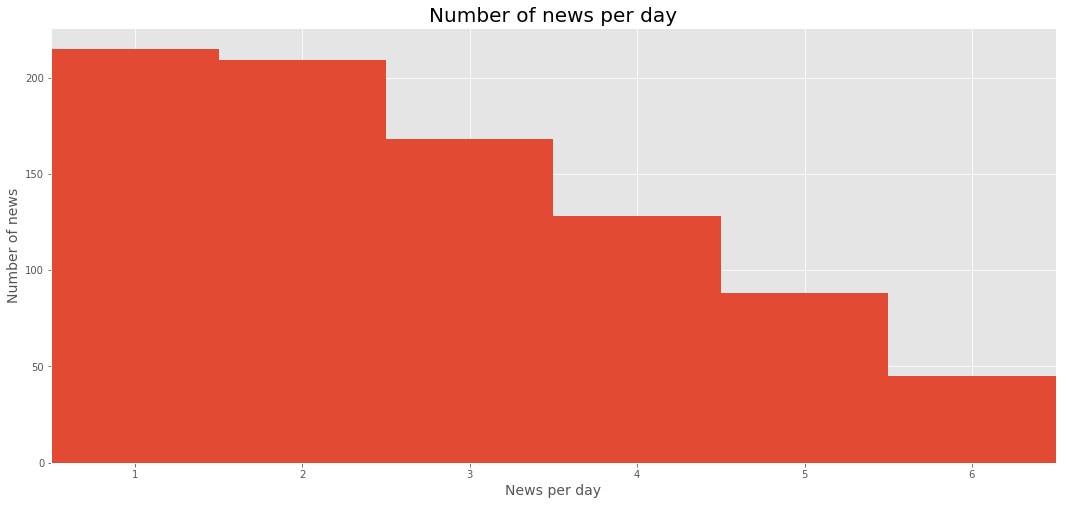

In [302]:
by_date = news['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 6.5)
plt.title("Number of news per day", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("News per day", fontdict={'fontsize': 14});
plt.savefig('hist_daily.png')

## Plot of number of news per day of the week.

In [242]:
by_weekday = news['Day of the Week'].value_counts().sortlevel()
by_weekday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.


Domingo       65
Jueves       512
Lunes        435
Martes       502
Miércoles    499
Sábado        89
Viernes      548
Name: Day of the Week, dtype: int64

In [243]:
# Get day of the week with datetime method
news['Day'] = news['Date'].dt.dayofweek

# Create dictionary to label categorical variable produced by 'dayofweek' method
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

# For each value in 'Weekday', apply function that labels with corresponding name of the weekday
news['Day'] = news['Day'].apply(lambda x: days[x])

In [244]:
# Order levels of factor variable

news['Day'] = \
    pd.Categorical(news['Day'], ['Monday','Tuesday','Wedsnesday','Thursday','Friday','Saturday','Sunday'])

In [245]:
# Get count by weekday

by_weekday = news['Day'].value_counts().sortlevel()
by_weekday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  This is separate from the ipykernel package so we can avoid doing imports until


Monday        435
Tuesday       502
Wedsnesday    499
Thursday      512
Friday        548
Saturday       89
Sunday         65
Name: Day, dtype: int64

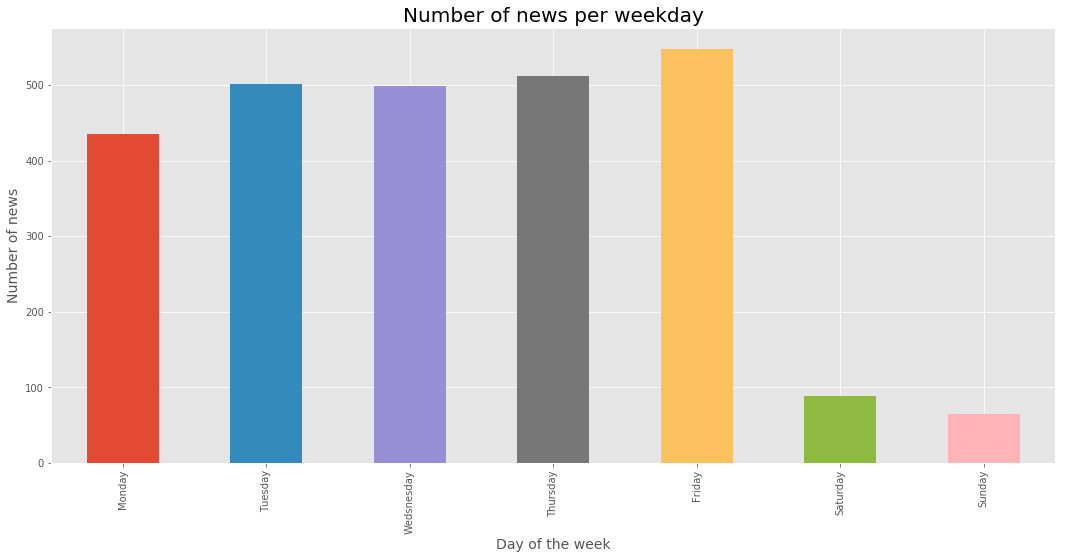

In [303]:
# Plot of number of speeches per day of the week

by_weekday.plot.bar()
plt.title("Number of news per weekday", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});
plt.savefig('bar_weekday.png')

## Plot of number of news per month

In [327]:
# Get count by month

by_month = news['Month'].value_counts().sort_index()
by_month

1     217
2     301
3     223
4     227
5     206
6     175
7     238
8     244
9     216
10    240
11    193
12    170
Name: Month, dtype: int64

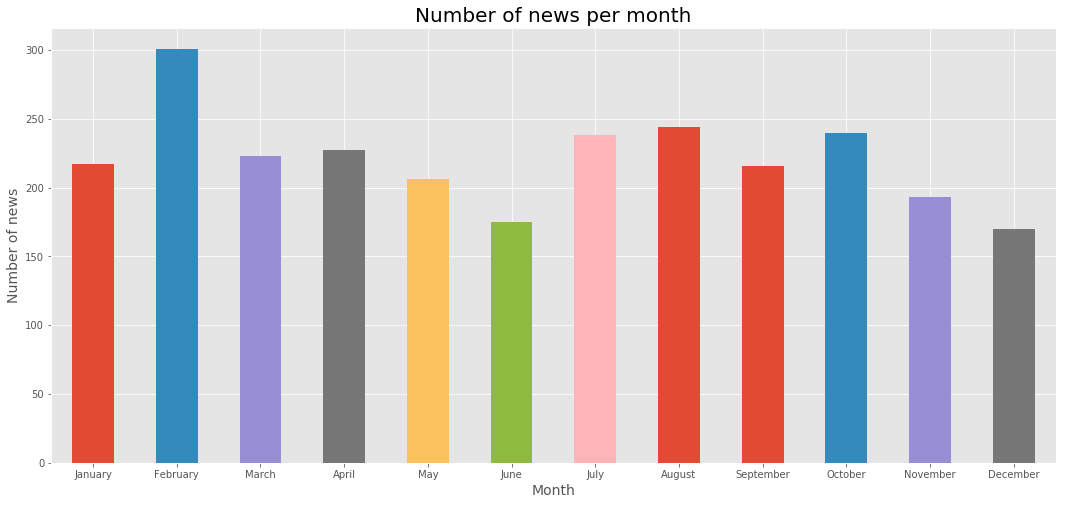

In [328]:
by_month.plot.bar()
plt.title("Number of news per month", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.xticks(range(12), labels, rotation='horizontal');
plt.savefig('bar_month.png')

## Plot of number of news per year.

In [249]:
# Get count by year

by_year = news['Year'].value_counts().sort_index()
by_year

2016    692
2017    758
2018    874
2019    326
Name: Year, dtype: int64

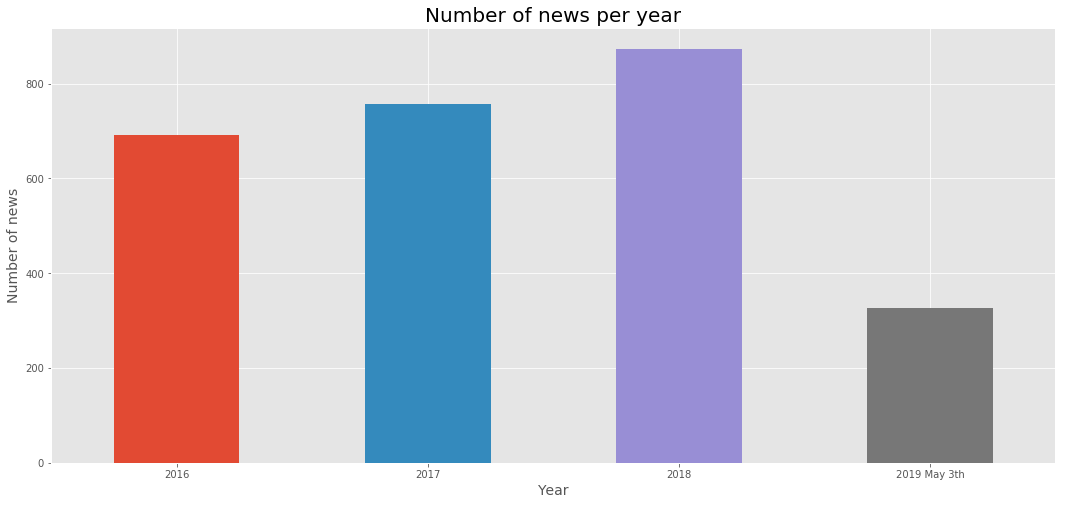

In [306]:
by_year.plot.bar()
plt.title("Number of news per year", fontdict={'fontsize': 20})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Year", fontdict={'fontsize': 14})
labels = ['2016','2017','2018','2019 May 3th']
plt.xticks(range(4), labels, rotation='horizontal');
plt.savefig('bar_year.png')

## Plot of number of news per month (all period).

In [251]:
# Group by month

by_year_month = pd.groupby(news, by=[news['Date'].dt.year, news['Date'].dt.month])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until


In [252]:
month_labels = ['2016-1','2016-2','2016-3','2016-4','2016-5','2016-6','2016-7','2016-8','2016-9','2016-10','2016-11','2016-12',\
          '2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7','2017-8','2017-9','2017-10','2017-11','2017-12',\
          '2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12',\
          '2019-1','2019-2','2019-3','2019-4','2019-5']

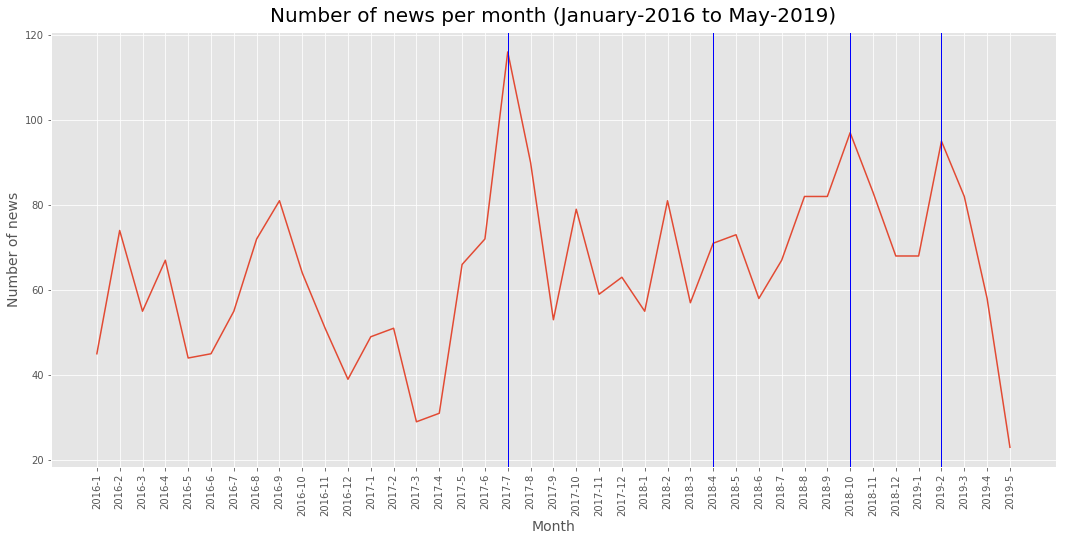

In [307]:
by_month = by_year_month['Month'].agg('count')
by_month.plot()
plt.title("Number of news per month (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of news", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=37, linewidth=1, color='b');
plt.axvline(x=33, linewidth=1, color='b');
plt.axvline(x=18, linewidth=1, color='b');
plt.savefig('line_month.png')

Averiguar que pasaron en los picos

In [357]:
# Concatenate all speeches in one string

all_news = news.no_accent.str.cat(sep=',')

In [358]:
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [359]:
# Strip punctuation from string

all_news = no_punct(all_news)

In [360]:
# Lowercase
all_news = all_news.lower()

In [361]:
len(all_news)

6533435

In [362]:
# Tokenize text

all_tokens = word_tokenize(all_news)

In [363]:
# Eliminate stopwords in Spanish

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [364]:
# Grab stopwords in Spanish

stopwords_esp = stopwords.words('spanish')

In [365]:
# Drop stopwords

all_tokens = no_stopwords(all_tokens)

In [366]:
len(all_tokens)

588402

In [408]:
text_news = nltk.Text(all_tokens)

## Analisis mediante NLTK

In [421]:
text_news.concordance('tranvia', width=115)

Displaying 13 of 13 matches:
izarse ciudadanos tambien cambiado decada tras decada tranvia trolebuses buses tradicionales taxis transmilenio med
elos transporte valido ciudadanos movilizarse capital tranvia mulas primer tranvia recorrio calles ciudad halado mu
o ciudadanos movilizarse capital tranvia mulas primer tranvia recorrio calles ciudad halado mulas inicio operacion 
rido chapinero posteriormente amplio mas zonas ciudad tranvia electrico anos despues 1910 llego ciudad tranvia elec
udad tranvia electrico anos despues 1910 llego ciudad tranvia electrico desplazo vehiculos halados animales vez nac
desplazo vehiculos halados animales vez nacio empresa tranvia municipal bogota permitio ampliar rutas mas barrios c
 habia cerca 29 carros electricos 1948 varios vagones tranvia quemados debido hechos orden publico desataron asesin
to caudillo liberal jorge eliecer gaitan 9 abril 1951 tranvia dejo funcionar ciudad decision alcalde epoca fernando
sca reforzar apropiacion sistema patrimonio

In [422]:
text_news.concordance('peaje', width=115)

Displaying 12 of 12 matches:
 norte calle 182 limite chia carrera septima calle 192 peaje avenida primero mayo avenida boyaca carrera 68 carrera
uecos calle 19 carreras 3 30 carrera septima calle 192 peaje avenida primero mayo avenida boyaca carrera 68 carrera
a norte carrera septima vale pena aclarar anuncio ayer peaje hacia norte queremos avanzar ampliacion autopista nort
avanzar ampliacion autopista norte cinco carriles cada peaje monumento heroes moderna via transmilenio ciclorrutas 
os disenos avenida boyaca calle 183 conectarse troncal peaje conexion autopista norte avenida guaymaral estudios di
comenzado trabajar ani hacia futuro 25 ciento recursos peaje autopista sur vaya financiar alo 33 ciento aqui autopi
dijo alcalde ademas explico trafico mayor hacia ciudad peaje pasan 35000 carros calle 170 90000 saliendo 127 120000
lando apertura manual puertas ingresando sistema pagar peaje intervenciones objetivo mitigar accidentalidad usuario
 calle 193 avenida boyaca calle 183 conecta

In [423]:
text_news.concordance('parrillero', width=115)

Displaying 25 of 28 matches:
nces decreto restringe motociclistas acompanamiento parrillero hombre mayor 14 anos zona delimitada ciudad primero
 ciudad primero objetivo medida reducir casos hurto parrillero desciende motocicleta arrebatar celulares u objetos
edida concentra cerca 40 casos hurto bajo modalidad parrillero va contribuir medidas efectuando ciudad trabajando 
 afirmo garcia conozca proyecto decreto restriccion parrillero hombre bogota aqui httpstcowxdiouu8lk pictwittercom
plazar viernes entrada vigencia decreto restringira parrillero hombre moto zonas ciudad contentos mesa realizamos 
o inclusion dos excepciones mas decreto restriccion parrillero hombre mayor 14 anos sera decretado viernes segunda
cumplido decreto 068 01 febrero 2018 prohibe hombre parrillero mayor 14 anos zona delimitada bogota asi aseguro co
bogota entregaron primer balance medida restriccion parrillero hombre moto mayores 14 anos comenzo regir pasado 2 
ria seguridad convivencia justicia zona restriccion

In [427]:
text_news.concordance('pico', width=115)

Displaying 25 of 207 matches:
roximo martes 12 enero 2016 vuelve aplicar restriccion pico placa vehiculos particulares horario habitual 600 am 8
nar vagones segundo aumentar expresos mas usados horas pico tercer lugar revisar rutas sitp ver cambios podrian ha
rgar tarjetas internet disminuira filas recargas horas pico adicionalmente podra recargar puntos paga ciudad mas 2
nar vagones segundo aumentar expresos mas usados horas pico tercer lugar revisar rutas sitp ver cambios podrian ha
rgar tarjetas internet disminuira filas recargas horas pico adicionalmente podra recargar puntos paga ciudad mas 2
general santander troncal autopista sur movilizan hora pico 16 mil personas seis rutas operan soacha g43 k43 e44 g
i cobijado razones aparece persona fallecida excepcion pico placa vehiculo automotor aparece rlcpd 5 si beneficiar
buses diesel equivalentes inclusion buses duales horas pico 630 am 730 am veran beneficiados 8812 usuarios largo j
 40 pasando promedio 82 kmshora cerca 145 kmshora 

In [428]:
text_news.concordance('carril', width=115)

Displaying 25 of 143 matches:
opista sur policia transito autorizara unicamente uso carril derecho calzada exclusiva transmilenio calle 59 sur s
uya ingreso caso plan exodo viernes sabado aprobo uso carril norte sur plan retorno contrario policia transito est
4 medidas seguridad vial separacion fisica ciclorruta carril mixto demarcacion horizontal cicloruta intersecciones
o nueva cara carrera 11 norte ciudad ahora via cuenta carril exclusivo ciclistas tres carriles trafico vehiculos n
vial sido intervenidos representa cerca 20 kilometros carril aproximadamente misma distancia recorre vehiculo auto
tiempo reaccionar frenado inesperado cambio repentino carril cualquier comportamiento peligroso personasmuchas esc
 noticias positivas ciudad publicacion pliegos tercer carril via bogota girardot construccion tercer carril mosque
tercer carril via bogota girardot construccion tercer carril mosquera hacia rio bogota excedentes prediales aproba
o generando represamiento carrera 7 incluso afecta

In [436]:
text_news.concordance('venezolanos', width=115, lines=50)

Displaying 50 of 94 matches:
o dias pasados sistema transmilenio arrestados tres venezolanos tras ser sorprendidos hurtandole celular ciudadana 
stor melenje comandante policia transmilenio aclaro venezolanos llegan ciudad vienen delinquir autoridades seguiran
as cometan delitos ano pasado presentaron 344 casos venezolanos cuales 241 impuso medida aseguramiento dijo transmi
enciones obedecen casos aislados busca estigmatizar venezolanos llegado pais busca mejores oportunidades capturados
rprendido 5 celulares interior portacomidas llegada venezolanos bogota busca oportunidades alcaldia adelanta accion
tiempo migracion colombia registra 25000 ciudadanos venezolanos laboran capital permiso especial inmensa mayoria ve
os laboran capital permiso especial inmensa mayoria venezolanos aqui gente buena trabajadora tema humanitario dejad
nfantiles ano escolar matricularon 1031 estudiantes venezolanos capital trabaja cuenten permisos especiales fin vin
ia salvoconductos migratorios expedicion do

In [430]:
text_news.concordance('paro', width=115)

Displaying 6 of 6 matches:
 24 horas dia proximo miercoles 10 mayo 2017 anunciado paro taxistas bogota ciudades pais situacion secretario mov
extintor evacuar caso incendio causas hacer hacer caso paro cardiorrespiratorio atoramiento causas hacer hacer cas
ndos salieron pasado mas dos meses arranco via campana paro paradero sensibilizo informo pasajeros conductores rie
mpano proceso dialogo convocaron reuniones convocantes paro defensores derechos humanos administracion distrital s
ieza calles 12 localidades resultaron afectadas cuenta paro aguas bogota sigue trabajo parar ademas recogida rezag
nas altero orden publico agredio fuerza publica bogota paro civico nacional explico arreglos producto hechos termi


In [431]:
text_news.concordance('marcha', width=115)

Displaying 25 of 150 matches:
elantado penalosa desarrollo programa vivienda pondra marcha penso ademas trabajos equipamientos necesarios mejora
rero 2015 ejemplo numero biciusuarios carrera 11 puso marcha jueves aumento mas 9000 indicador aumento uso bicicle
osible mejorar situacion transmilenio trabajamos toda marcha explico alcalde destruyeron buses llenos pasajeros ni
nofacebookalcaldia mayor bogota distrito trabaja toda marcha lograr tapar menor tiempo posible 7000 huecos identif
contro fecha recibido ninguna relacionada realizacion marcha parte taxistas dia 14 marzo tener plan manejo transit
a sera directo unico responsable afectaciones deriven marcha conformidad marco normativo dispuesto sdm tipo situac
traciondel alcalde mayor bogota enrique penalosa puso marcha laruta atencion integral primera infancia promovera d
cuyo producto final pliegos licitacion tambien pondra marcha programa reubicacion anticipada redes servicios publi
sera cien ciento electrico primera linea metro bog

In [432]:
text_news.concordance('abuso', width=115)

Displaying 25 of 28 matches:
 hecho marco conmemoracion dia mundial toma conciencia abuso maltrato vejez promovido asamblea general naciones uni
nductas alimentarias violencia familiar social escolar abuso sexual uso abuso sustancias psicoactivas conducta suic
ias violencia familiar social escolar abuso sexual uso abuso sustancias psicoactivas conducta suicida embarazo mato
 desgarradoras historias protagonizaron sayayaines ver abuso prostitucion menores tortura desaparicion descuartizam
mas maltrato identificar diferentes maneras constituye abuso animal senalo programa capacitacion bienestar animal c
s personales secuelas dano bien ajeno injuria calumnia abuso confianza invasion tierras inmuebles conocer puntos in
abian operador centro integrarte presuntamente ocurrio abuso vinculado 2013 suspendido septiembre ano pasado rusinq
interesar apartan cargo docentes investigados presunto abuso menores mejores peliculas ver cinemateca proxima seman
permite tipo vulneraciones derechos ninos a

In [433]:
text_news.concordance('esmad', width=115)

Displaying 16 of 16 matches:
ficativo 600 hombres mujeres fuerza disponible policia esmad vigilando calles dia noche gracias estrategia segurida
book alcaldia mayor bogota organismo senala uso fuerza esmad intervino afirma mayoria retiro voluntariamente seis p
uir campamento asi mismo personeria afirmo lugar actuo esmad personas detenidas conducidas upj contrario intervenci
2 esperaban miembros campamento momento decidio retiro esmad dijo personeria ultimos campistas acompano carrera 7 c
ente policia procedio retirar personas negaron hacerlo esmad ningun momento efectuo algun procedimiento ningun mome
sponible policia bogota escuadron movil antidisturbios esmad venido senalando diferentes medios unidad policial enc
s participantes unieron escuadron movil antidisturbios esmad carabineros convirtieron rescatistas grupo busqueda re
 controlar avalanchas gente recuperacion orden publico esmad ademas tener valentia enfrentar desordenes sociales ta
resentaron hechos lamentar vez reacciono op

In [434]:
text_news.concordance('protesta', width=115)

Displaying 25 of 33 matches:
tociclistas protestaron pintaron hueco hace dos anos protesta muerte companera distrito hizo cargo hueco sino fin 
lcaldia mayor bogota dc derechos reservados acciones protesta anuncio grupo taxistas lunes secretaria distrital mo
rma prevenir posibles rinas puedan afectar ejercicio protesta pacifica derecho movilizacion dicho encuentro manife
campamento paz 50 dias ofrecio seguridad apoyo dicha protesta pacifica gozara todas garantias 2 hace dias distrito
as casas afirmaron firma nuevo acuerdo paz proposito protesta simbolica tarea cumplida 3 procedimiento madrugada p
alizadores vehiculos querido regularse derecho poner protesta decirle conductor senor usted haciendo accion ilegal
sencia fiscalia judicializar personas lugar realizar protesta pacifica decidan cometer actos vandalismo criminales
ron ciudadanos siquiera usuarios sistema mantuvieron protesta varias horas explico rojas tambien aseguro trabajado
 ciudadanos culpa tampoco pueden solucionar problem

In [435]:
text_news.concordance('protestas', width=115)

Displaying 25 of 29 matches:
 circunvalar vias encontraba critico blanco diversas protestas anos anteriores cuenta motociclista perdio vida caus
fuerzos twitterserviciudadanofacebookalcaldia bogota protestas presentaron manana viernes soacha producto anos retr
on requiere obra dificil situacion presento producto protestas vez mas vio empanada actos vandalicos gerente transm
rcunvalar vias encontraba deplorable blanco diversas protestas anos anteriores cuenta motociclista perdio vida caus
 masivo pasajeros registra municipio bogota generado protestas usuarios sistemalos participantes coincidieron neces
 explico mejia distrito obligacion ofrecer garantias protestas transcurran calma si llegan presentar agresiones act
cerca 34 mil usuarios transmilenio afectados jornada protestas ademas 1200 ninos asistieron clases fin proteger int
eaccion interes administracion penalosa criminalizar protestas gracias tambien apoyo derechos humanos personeria co
zf sec seguridad bog seguridadbog 26 enero 

In [417]:
text_news.similar('marcha')

ciudad servicio funcionamiento adelantando administracion mejor
haciendo capacidad operacion transversal ciudadania traves naturaleza
sabana disposicion sellos planeando organismos ayudando entregando


In [420]:
text_news.collocations(100)

enrique penalosa; alcaldia mayor; mayor bogota; millones pesos; 571
381; espacio publico; alcalde enrique; lunes viernes; reciba noticias;
381 3000; telefono 571; policia metropolitana; portales paginas; asi
mismo; siganos redes; derechos reservados; redes reciba; 3000 horario;
twitter serviciudadanofacebook; viernes 700; red portales; paginas
sector; jardin botanico; transporte publico; integracion social;
ciudad bolivar; horario atencion; noticias alcalde;
serviciudadanofacebook alcaldia; administracion distrital; san
cristobal; publico lunes; secretaria movilidad; secretaria distrital;
habitantes calle; metros cuadrados; juan pablo; autopista norte;
atencion publico; bogota cra; pablo bocarejo; alcalde 2017; alcaldia
bogota; seguridad vial; 2017 alcaldia; pagina web; billones pesos;
metropolitana bogota; sector alcaldia; alcaldia enrique; alcalde
penalosa; rafael uribe; facebook alcaldia; convivencia justicia;
secretaria integracion; calidad vida; bogota red; servicios publicos;
pue

In [367]:
# See sorted frequency distribution of all tokens

nltk.FreqDist(all_tokens).most_common()

[('bogota', 7953),
 ('ciudad', 4413),
 ('mas', 4398),
 ('calle', 2892),
 ('alcaldia', 2803),
 ('secretaria', 2657),
 ('mayor', 2408),
 ('penalosa', 2398),
 ('personas', 2140),
 ('seguridad', 2073),
 ('alcalde', 2063),
 ('movilidad', 1808),
 ('publico', 1747),
 ('carrera', 1719),
 ('distrital', 1593),
 ('parte', 1593),
 ('ano', 1566),
 ('tambien', 1522),
 ('policia', 1520),
 ('ciudadanos', 1505),
 ('transmilenio', 1484),
 ('asi', 1482),
 ('atencion', 1432),
 ('2018', 1408),
 ('sistema', 1338),
 ('enrique', 1336),
 ('servicio', 1334),
 ('transporte', 1304),
 ('ademas', 1292),
 ('anos', 1288),
 ('2017', 1248),
 ('sector', 1226),
 ('millones', 1196),
 ('distrito', 1178),
 ('pesos', 1169),
 ('administracion', 1139),
 ('10', 1088),
 ('sur', 1086),
 ('vehiculos', 1085),
 ('avenida', 1069),
 ('si', 1054),
 ('dos', 1046),
 ('dia', 1042),
 ('trabajo', 1002),
 ('usuarios', 995),
 ('social', 987),
 ('estan', 977),
 ('traves', 965),
 ('proyecto', 951),
 ('espacio', 944),
 ('manera', 943),
 ('norte'

## Word cloud

In [368]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [266]:
of_interest = ['seguridad','educación','pobreza','desarrollo','empleo','trabajo','recursos','vida','social','inversión',\
 'niños','víctimas','policía','conflicto','futuro','economía','justicia','plan','programa','resultados',\
 'pasado','familia','congreso','infraestructura','derechos','unidos','proyectos','comercio','calidad',\
 'crecimiento','reforma','salud','prosperidad','oportunidad','mundo','internacional',\
 'problemas','obras','alcalde','violencia','vivienda','oportunidades','marcha','trabajar','construir',\
 'campo','pueblo','compromiso','nuevo','nueva'\
 ,'agua','tecnología','acceso','alcaldes','democracia','cambio','derecho','empresa','empresas','problema','realidad'\
 ,'tierra','pobres','desempleo','extrema','responsabilidad','ciudadanos','empresarios','juntos','inversiones',\
 'campesinos','cifras','fiscal','construcción','acción','instituciones','confianza','acuerdos','universidad',\
 'policías','ejército','colegio','cumplir','equidad','seguro','narcotráfico','militares','ciudades','tierras',\
 'ambiente','regalías','ciudad','programas','jóvenes','viviendas','hijos','reformas','servicio','unidad','bogotá',\
 'producción','económico','colegios','comunidades','bienestar','competitividad','energía','cifra','empleos',\
 'corrupción','mercados','patria','soldados','nación','información','mercado','equipo','puerto',\
 'cultura','comunidad','crisis','tratado','partido','progreso','campaña','humanos','venezuela','vías','público',\
 'corte','sena','institución', 'constitución','económica','industria,''niñas','pacífico','departamentos','innovación',\
 'leyes','ley','comisión','presupuesto','alianza','invertir','productos','deporte','territorio','guerrilla',\
 'presente','niño','inteligencia','méxico','estudiantes','caribe','creciendo','indicadores','gratis','libertad',\
 'medidas','acciones','precio','diálogo','exterior','café','brasil','chile','armada','metas','empresa','banco',\
 'justo','públicos','producir','impacto','transporte','constitucional','mar','río','dólares','dólar','duda',\
 'necesidad','políticas','públicas','servicios','rural','minería','militar','armado','plata','plazo','amigos',\
 'cafeteros','alimentos','reparación','respeto','visión','iniciativa','criminales','habana','reto','privado',\
 'prioridad','resultado','turismo','producto','cooperación','mesa','crimen','inversionistas','desigualdad',\
 'dificultades','histórico','histórica','planes','crédito','optimismo','costo','solución',\
 'riesgo','inflación','terrorismo','transparencia','mujeres','escuela','medios','estrategia','judicial','dios',\
 'municipio','sostenible','voluntad','protección','universidades','homicidios','restitución','fiscalía','infancia',\
 'climático','condición','ecuador','estudios','cobertura','delito','responsables',\
 'petróleo','partidos','civil','hechos','integración','aeropuerto','padres','deuda','comunicación','productividad',\
 'agricultura','planeta','ciudadano','demanda','petro','investigación','competencia','negociación','decreto',\
 'libros','delitos','ricos','tendencia','eficiente','invernal','trabajadores','porcentaje','riqueza',\
 'coordinación','vulnerables','cese','corea','exportaciones','institucionalidad','produce','retos','extorsión',\
 'eficiencia','democrática','fuego','niña','brechas','comandante','jueces','jugar','biodiversidad','natural',\
 'reconciliación','efectividad','madres','político','moderno','esperanza','canciller','drogas',\
 'gas','planeación','tragedia','computadores','ciudadanía','costos','autopistas','eficacia','negociando','enemigos',\
 'elecciones','alias','ambiental','oro','comandantes','dinero','frontera','puestos','subsidio','disposición',\
 'rendición','secuestro','minas','indígenas','financiero','prensa','cafetero','expertos','docentes','naturaleza',\
 'navarro','claudia','precios','concesiones','invierno','ilegal','eln','inseguridad','histórico','histórica',\
 'déficit','comercial','mujer','terroristas','impuestos','logros','inaugurar','posconflicto',\
 'productivo','desplazados','libro','delincuentes','trámites','cárcel','intervención','negociar',\
 'socios','reserva','formalización','madre','acueducto','puente','impuesto','ciencia','parque','tratados',\
 'periodistas','negociaciones','hospital','conpes','computador','coca','marihuana',\
 'tributaria','competir','desigualdades','dane','ofensiva','empresarial','metro','tranvia','transmilenio','tren',\
 'igualdad','hospitales','exportadores','industrial','sangre','ahorro','vecinos','droga','impunidad','muerte',\
 'maestros','agrario','consumidores','muertos','bomberos','inclusión','pardo','turbay','angela','cabecillas',\
 'emprendimiento','paramilitares','competitivos','formales','campesino','pib','emergencia',\
 'inauguración','potable','salarios','matemáticas','exportar','competitivo','gremios','periodismo','crímenes',\
 'coldeportes','economistas','digital','juventud','gratuidad','diversidad','regulación','libertades','corruptos']

In [267]:
len(of_interest)

428

In [268]:
# Filter list of all tokens based on list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]

In [269]:
# Join list in string

tokens_of_interest_str = ' '.join(tokens_of_interest)

In [270]:
# Write to txt file

with open('tokens_of_interest_str.txt', 'a') as f:
    f.write(tokens_of_interest_str)

In [271]:
fdist = nltk.FreqDist(tokens_of_interest)

In [272]:
fdist.most_common()

[('bogotá', 7429),
 ('ciudad', 4413),
 ('seguridad', 2072),
 ('alcalde', 2063),
 ('público', 1727),
 ('policía', 1517),
 ('ciudadanos', 1505),
 ('transmilenio', 1484),
 ('servicio', 1334),
 ('transporte', 1304),
 ('trabajo', 988),
 ('social', 986),
 ('servicios', 913),
 ('vida', 879),
 ('metro', 846),
 ('niños', 826),
 ('información', 725),
 ('ambiente', 716),
 ('desarrollo', 703),
 ('construcción', 697),
 ('derechos', 687),
 ('obras', 648),
 ('calidad', 589),
 ('vías', 581),
 ('protección', 577),
 ('nueva', 575),
 ('salud', 548),
 ('nuevo', 537),
 ('empresa', 530),
 ('vivienda', 529),
 ('parque', 525),
 ('plan', 524),
 ('comunidad', 516),
 ('programa', 511),
 ('ciudadanía', 511),
 ('acciones', 506),
 ('empresas', 460),
 ('ambiental', 457),
 ('pasado', 457),
 ('recursos', 447),
 ('agua', 418),
 ('inversión', 401),
 ('mujeres', 396),
 ('integración', 395),
 ('jóvenes', 382),
 ('justicia', 376),
 ('equipo', 371),
 ('intervención', 368),
 ('proyectos', 351),
 ('impuesto', 350),
 ('medidas

## Uso de las palabras seguridad (seguridad) y movilidad (movilidad) en el tiempo.

In [273]:
news['seguridad'] = [col_counter(news['no_stopwords'][i], 'seguridad') for i in range(len(news['no_stopwords']))]

In [274]:
news['movilidad'] = [col_counter(news['no_stopwords'][i], 'movilidad') for i in range(len(news['no_stopwords']))]

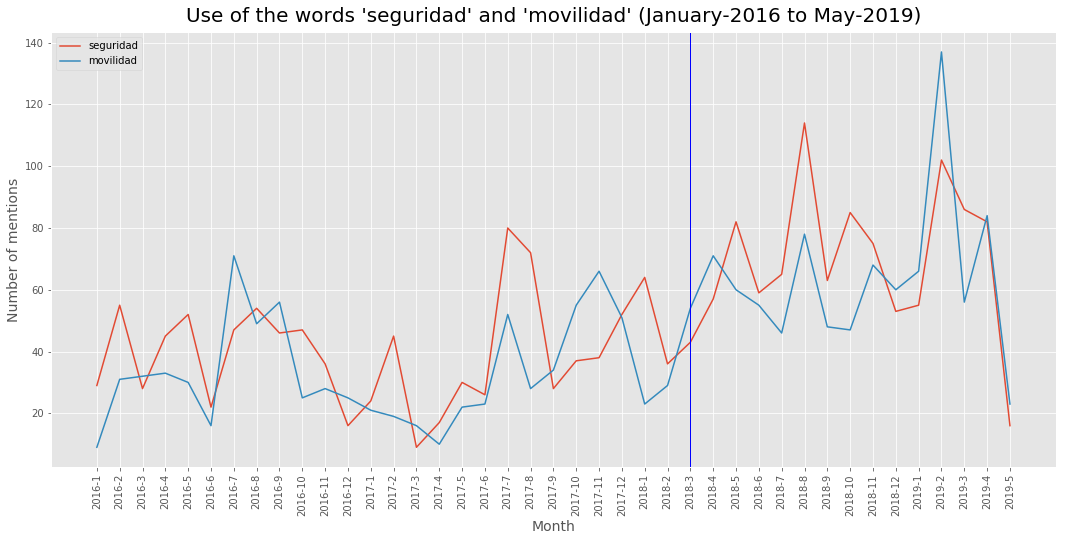

In [308]:
seguridad_by_month = by_year_month['seguridad'].agg('sum')
movilidad_by_month = by_year_month['movilidad'].agg('sum')
seguridad_by_month.plot()
movilidad_by_month.plot()
plt.title("Use of the words 'seguridad' and 'movilidad' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['seguridad', 'movilidad'], loc='upper left');
plt.savefig('seguridad_movilidad_month.png')

## Uso de las palabras metro, transmilenio y septima en el tiempo.

In [276]:
news['metro'] = [col_counter(news['no_stopwords'][i], 'metro') for i in range(len(news['no_stopwords']))]

In [277]:
news['transmilenio'] = [col_counter(news['no_stopwords'][i], 'transmilenio') for i in range(len(news['no_stopwords']))]

In [278]:
news['séptima'] = [col_counter(news['no_stopwords'][i], 'séptima') for i in range(len(news['no_stopwords']))]

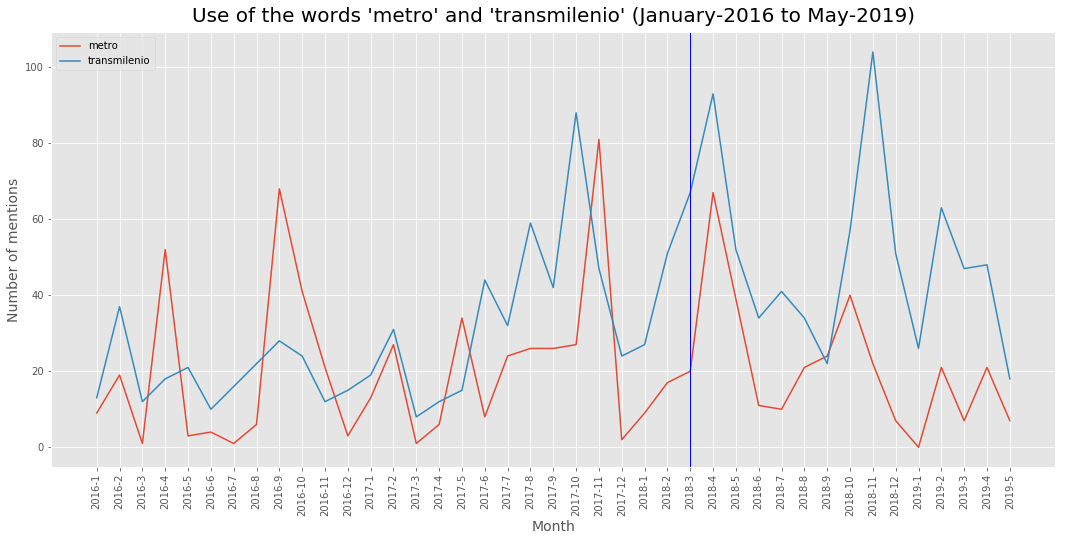

In [309]:
metro_by_month = by_year_month['metro'].agg('sum')
transmilenio_by_month = by_year_month['transmilenio'].agg('sum')
metro_by_month.plot()
transmilenio_by_month.plot()
plt.title("Use of the words 'metro' and 'transmilenio' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['metro', 'transmilenio'], loc='upper left');
plt.savefig('metro_transmilenio_month.png')

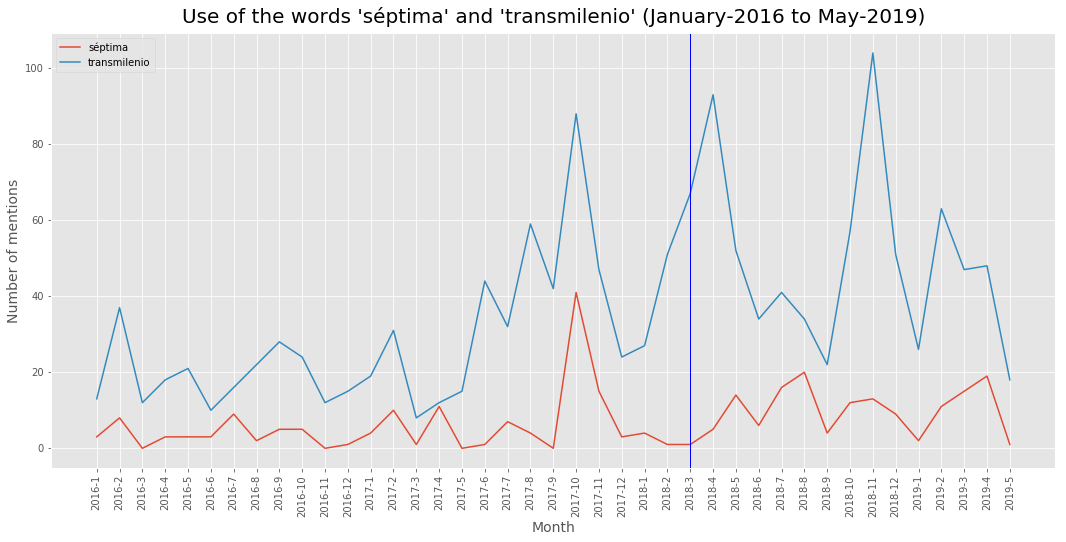

In [310]:
septima_by_month = by_year_month['séptima'].agg('sum')
transmilenio_by_month = by_year_month['transmilenio'].agg('sum')
septima_by_month.plot()
transmilenio_by_month.plot()
plt.title("Use of the words 'séptima' and 'transmilenio' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['séptima', 'transmilenio'], loc='upper left');
plt.savefig('séptima_transmilenio_month.png')

## Uso de las palabras crimen y venezolanos en el tiempo.

In [281]:
news['crimen'] = [col_counter(news['no_stopwords'][i], 'crimen') for i in range(len(news['no_stopwords']))]

In [282]:
news['venezolanos'] = [col_counter(news['no_stopwords'][i], 'venezolanos') for i in range(len(news['no_stopwords']))]

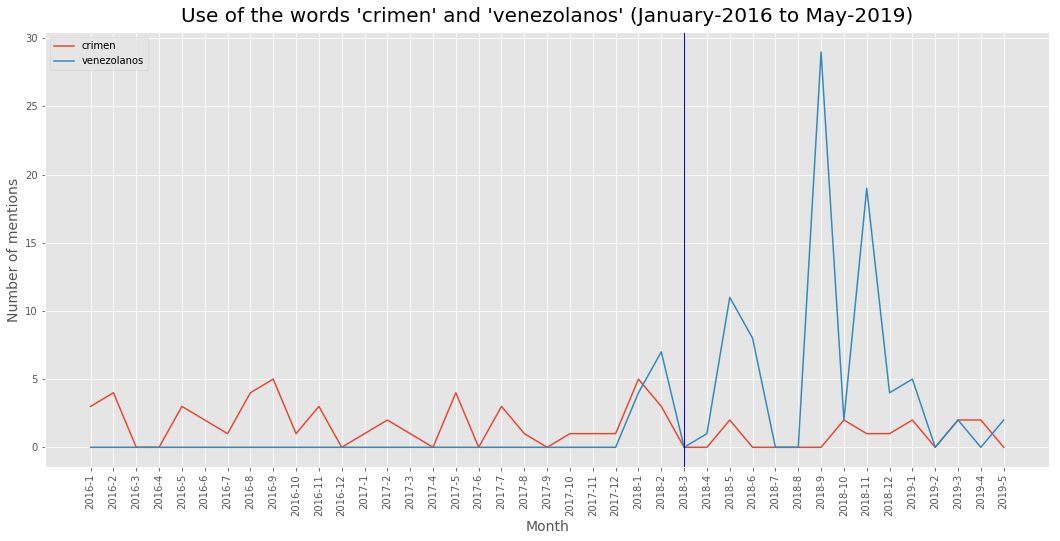

In [311]:
crimen_by_month = by_year_month['crimen'].agg('sum')
venezolanos_by_month = by_year_month['venezolanos'].agg('sum')
crimen_by_month.plot()
venezolanos_by_month.plot()
plt.title("Use of the words 'crimen' and 'venezolanos' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['crimen', 'venezolanos'], loc='upper left');
plt.savefig('crimen_venezolanos_month.png')

## Uso de las palabras hurto y bicicleta en el tiempo.

In [284]:
news['hurto'] = [col_counter(news['no_stopwords'][i], 'hurto') for i in range(len(news['no_stopwords']))]

In [285]:
news['bicicleta'] = [col_counter(news['no_stopwords'][i], 'bicicleta') for i in range(len(news['no_stopwords']))]

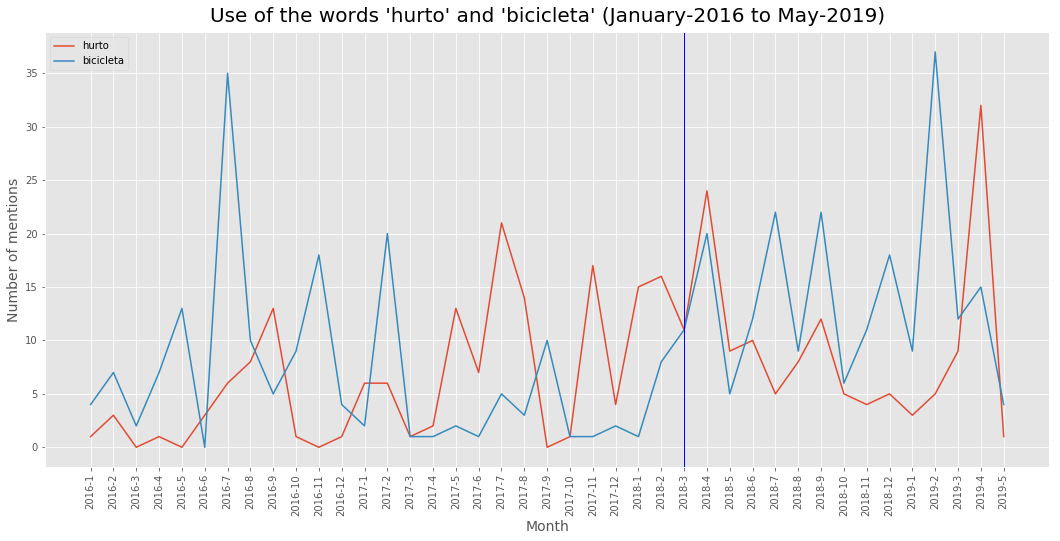

In [312]:
hurto_by_month = by_year_month['hurto'].agg('sum')
bicicleta_by_month = by_year_month['bicicleta'].agg('sum')
hurto_by_month.plot()
bicicleta_by_month.plot()
plt.title("Use of the words 'hurto' and 'bicicleta' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=26, linewidth=1, color='b')
plt.legend(['hurto', 'bicicleta'], loc='upper left');
plt.savefig('hurto_bicicleta_month.png')

## Uso de las palabras bronx y estupefacientes en el tiempo.

In [287]:
news['bronx'] = [col_counter(news['no_stopwords'][i], 'bronx') for i in range(len(news['no_stopwords']))]

In [288]:
news['estupefacientes'] = [col_counter(news['no_stopwords'][i], 'estupefacientes') for i in range(len(news['no_stopwords']))]

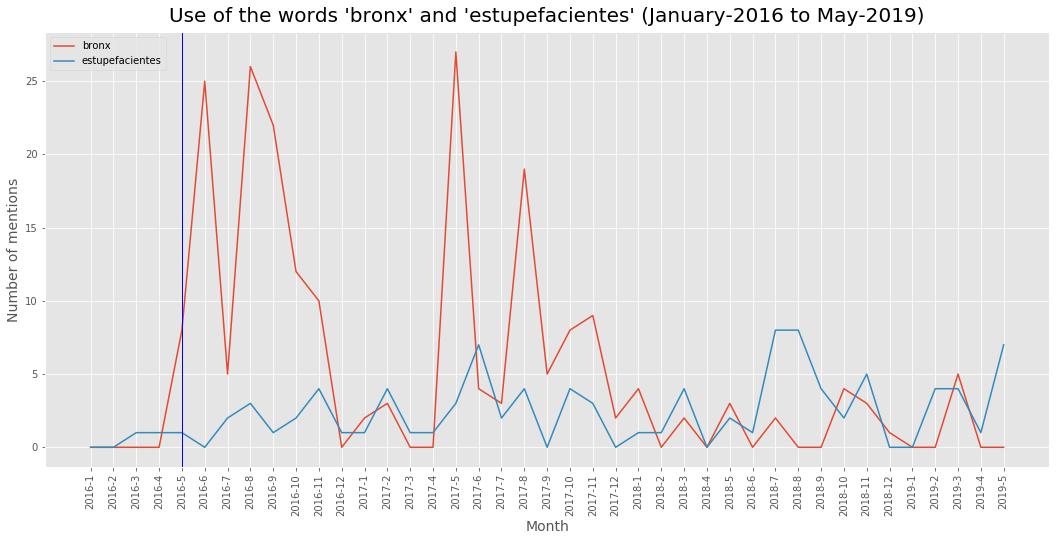

In [313]:
bronx_by_month = by_year_month['bronx'].agg('sum')
estupefacientes_by_month = by_year_month['estupefacientes'].agg('sum')
bronx_by_month.plot()
estupefacientes_by_month.plot()
plt.title("Use of the words 'bronx' and 'estupefacientes' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=4, linewidth=1, color='b')
plt.legend(['bronx', 'estupefacientes'], loc='upper left');
plt.savefig('bronx_estupefacientes_month.png')

En agosto de 2016 inicia la demolicion del bronx

## Uso de las palabras relacionadas con el paro en el tiempo.

In [290]:
news['paro'] = [col_counter(news['no_stopwords'][i], 'paro') for i in range(len(news['no_stopwords']))]

In [291]:
news['marcha'] = [col_counter(news['no_stopwords'][i], 'marcha') for i in range(len(news['no_stopwords']))]

In [292]:
news['violencia'] = [col_counter(news['no_stopwords'][i], 'violencia') for i in range(len(news['no_stopwords']))]

In [293]:
news['abuso'] = [col_counter(news['no_stopwords'][i], 'abuso') for i in range(len(news['no_stopwords']))]

In [184]:
news['violencia'] = [col_counter(news['no_stopwords'][i], 'violencia') for i in range(len(news['no_stopwords']))]

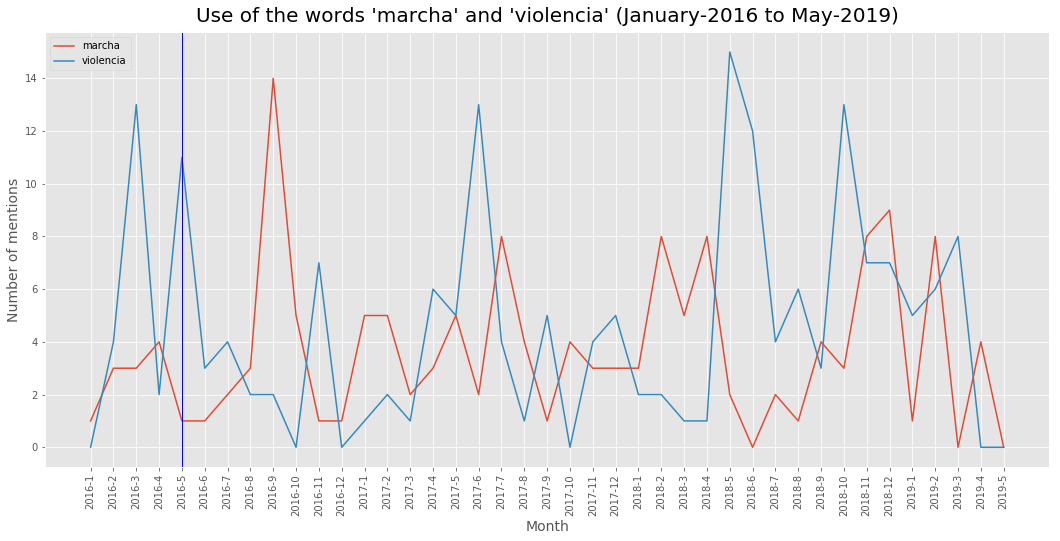

In [314]:
marcha_by_month = by_year_month['marcha'].agg('sum')
violencia_by_month = by_year_month['violencia'].agg('sum')
marcha_by_month.plot()
violencia_by_month.plot()
plt.title("Use of the words 'marcha' and 'violencia' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=4, linewidth=1, color='b')
plt.legend(['marcha', 'violencia'], loc='upper left');
plt.savefig('marcha_violencia_month.png')

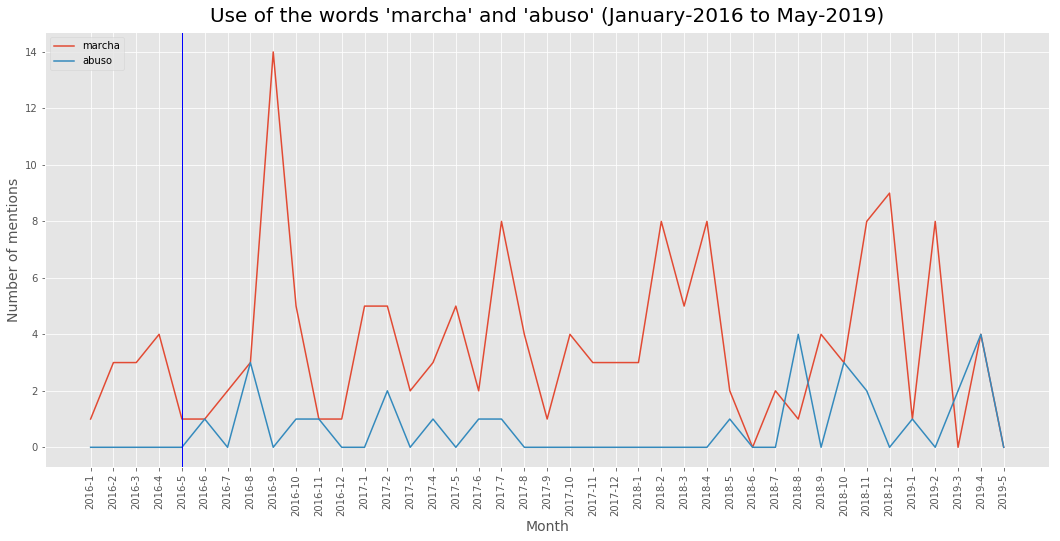

In [315]:
marcha_by_month = by_year_month['marcha'].agg('sum')
abuso_by_month = by_year_month['abuso'].agg('sum')
marcha_by_month.plot()
abuso_by_month.plot()
plt.title("Use of the words 'marcha' and 'abuso' (January-2016 to May-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Month", fontdict={'fontsize': 14})
labels = month_labels
plt.xticks(range(41), labels, rotation='vertical')
plt.axvline(x=4, linewidth=1, color='b')
plt.legend(['marcha', 'abuso'], loc='upper left');
plt.savefig('marcha_abuso_month.png')

## Uso de las palabras para politica pública en el tiempo.

In [296]:
news['educación'] = [col_counter(news['no_stopwords'][i], 'educación') for i in range(len(news['no_stopwords']))]

news['pobreza'] = [col_counter(news['no_stopwords'][i], 'pobreza') for i in range(len(news['no_stopwords']))]

news['campo'] = [col_counter(news['no_stopwords'][i], 'campo') for i in range(len(news['no_stopwords']))]

news['emprendimiento'] = [col_counter(news['no_stopwords'][i], 'emprendimiento') for i in range(len(news['no_stopwords']))]

news['formalización'] = [col_counter(news['no_stopwords'][i], 'formalización') for i in range(len(news['no_stopwords']))]

news['innovación'] = [col_counter(news['no_stopwords'][i], 'innovación') for i in range(len(news['no_stopwords']))]

news['industria'] = [col_counter(news['no_stopwords'][i], 'industria') for i in range(len(news['no_stopwords']))]

news['comercio'] = [col_counter(news['no_stopwords'][i], 'comercio') for i in range(len(news['no_stopwords']))]

news['servicios'] = [col_counter(news['no_stopwords'][i], 'servicios') for i in range(len(news['no_stopwords']))]

news['empleo'] = [col_counter(news['no_stopwords'][i], 'empleo') for i in range(len(news['no_stopwords']))]

news['defensa'] = [col_counter(news['no_stopwords'][i], 'defensa') for i in range(len(news['no_stopwords']))]

news['social'] = [col_counter(news['no_stopwords'][i], 'social') for i in range(len(news['no_stopwords']))]

news['salud'] = [col_counter(news['no_stopwords'][i], 'salud') for i in range(len(news['no_stopwords']))]

news['infancia'] = [col_counter(news['no_stopwords'][i], 'infancia') for i in range(len(news['no_stopwords']))]

news['infraestructura'] = [col_counter(news['no_stopwords'][i], 'infraestructura') for i in range(len(news['no_stopwords']))]

news['productividad'] = [col_counter(news['no_stopwords'][i], 'productividad') for i in range(len(news['no_stopwords']))]

news['competitividad'] = [col_counter(news['no_stopwords'][i], 'competitividad') for i in range(len(news['no_stopwords']))]

news['vivienda'] = [col_counter(news['no_stopwords'][i], 'vivienda') for i in range(len(news['no_stopwords']))]

news['ciencia'] = [col_counter(news['no_stopwords'][i], 'ciencia') for i in range(len(news['no_stopwords']))]

news['tecnología'] = [col_counter(news['no_stopwords'][i], 'tecnología') for i in range(len(news['no_stopwords']))]

news['transporte'] = [col_counter(news['no_stopwords'][i], 'transporte') for i in range(len(news['no_stopwords']))]

news['deporte'] = [col_counter(news['no_stopwords'][i], 'deporte') for i in range(len(news['no_stopwords']))]

news['minería'] = [col_counter(news['no_stopwords'][i], 'minería') for i in range(len(news['no_stopwords']))]

## Word Cloud 

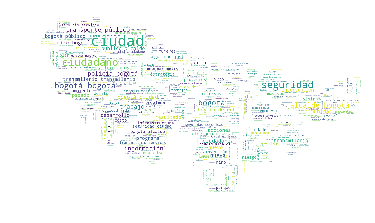

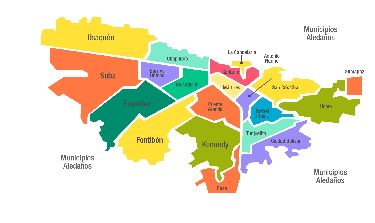

In [316]:
# Based on https://github.com/amueller/word_cloud/blob/master/examples/masked.py
# Word cloud requirements

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

d = path.dirname('/Users/sebastiancastrorodriguez/Desktop/2019-1/MCPP/tokens_of_interest_str.txt')

# Read the whole text
text = open(path.join(d, 'tokens_of_interest_str.txt')).read()

# Read the mask image
# taken from http://www.zonu.com/images/0X0/2011-08-16-14306/Colombia-outline-map.jpg
bogota_mask = np.array(Image.open(path.join(d, "mapa-localidades-bogota.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=bogota_mask)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file(path.join(d, "wordcloud.png"))

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(bogota_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [298]:
news

,Year,Month,Day,Hour,Day of the Week,Title,URL,New,Date,no_punct,...,infancia,infraestructura,productividad,competitividad,vivienda,ciencia,tecnología,transporte,deporte,minería
0,2016,1,Friday,00:30,Viernes,Secretaría de Ambiente advierte incremento de ...,http://www.bogota.gov.co/article/secretar%C3%A...,", La Secretaría de Ambiente advierte el riesgo...",2016-01-01,la secretaría de ambiente advierte el riesgo ...,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,Friday,00:10,Viernes,"Por $3.000 anuales, población vulnerable podrá...",http://www.bogota.gov.co/article/temas-de-ciud...,", A partir del 1° de enero de 2016 la Red de B...",2016-01-01,a partir del 1° de enero de 2016 la red de bi...,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,Monday,00:37,Lunes,"El sacerdote Wilfredo Grajales, el hombre que ...",http://www.bogota.gov.co/article/temas-de-ciud...,", El alcalde Mayor de Bogotá, Enrique Peñalosa...",2016-01-04,el alcalde mayor de bogotá enrique peñalosa p...,...,0,0,0,0,0,0,0,0,0,0
3,2016,1,Monday,00:10,Lunes,La Nación y el Distrito construirán 30.000 viv...,http://www.bogota.gov.co/article/temas-de-ciud...,", El ministro de Vivienda, Luis Felipe Henao, ...",2016-01-04,el ministro de vivienda luis felipe henao anu...,...,0,0,0,0,6,0,0,0,0,0
4,2016,1,Tuesday,09:58,Martes,Alcaldía de Bogotá anuncia que promoverá los g...,http://www.bogota.gov.co/content/alcald%C3%ADa...,", La Secretaría de Gobierno informó que no exi...",2016-01-05,la secretaría de gobierno informó que no exis...,...,0,0,0,0,0,0,0,0,0,0
5,2016,1,Tuesday,08:45,Martes,"“Queremos 20 gerentes para la ciudad”, Miguel ...",http://www.bogota.gov.co/article/%E2%80%9Cquer...,", El secretario distrital de Gobierno, Miguel ...",2016-01-05,el secretario distrital de gobierno miguel ur...,...,0,1,0,0,0,0,0,0,0,0
6,2016,1,Wedsnesday,12:49,Miércoles,‘Vamos a acatar las decisiones de las autorida...,http://www.bogota.gov.co/article/%E2%80%98vamo...,", El secretario de Ambiente de Bogotá, Francis...",2016-01-06,el secretario de ambiente de bogotá francisco...,...,0,0,0,0,0,0,0,0,0,0
7,2016,1,Wedsnesday,00:10,Miércoles,"Tarifas de comparendos, patios y grúas se incr...",http://www.bogota.gov.co/article/tarifas-de-co...,", Como sucede todos los años, comienzan a regi...",2016-01-06,como sucede todos los años comienzan a regir ...,...,0,0,0,0,0,0,0,0,0,0
8,2016,1,Friday,10:22,Viernes,Autoridades tienen todo dispuesto para el Plan...,http://www.bogota.gov.co/content/autoridades-t...,", Con el fin de garantizar la salida y entrada...",2016-01-08,con el fin de garantizar la salida y entrada ...,...,0,0,0,0,0,0,0,6,0,0
9,2016,1,Friday,00:20,Viernes,Cierre de dos carriles de la Carrera 9 entre t...,http://www.bogota.gov.co/article/cierre-de-dos...,", Con el fin de adelantar la construcción de m...",2016-01-08,con el fin de adelantar la construcción de mi...,...,0,0,0,0,0,0,0,0,0,0


In [299]:
totals_by_topic = news.iloc[:,13:].sum()
totals_by_topic = totals_by_topic.sort_values(ascending=False)
totals_by_topic

seguridad          2072
movilidad          1807
transmilenio       1484
transporte         1304
social              986
servicios           913
metro               846
salud               548
vivienda            529
bicicleta           385
infraestructura     341
hurto               303
séptima             292
educación           278
bronx               214
comercio            207
violencia           187
marcha              150
tecnología          138
infancia            125
industria           101
estupefacientes      98
venezolanos          94
deporte              89
empleo               87
crimen               61
defensa              58
emprendimiento       52
campo                40
pobreza              35
abuso                28
innovación           22
productividad        22
competitividad       22
ciencia              22
formalización        17
paro                  6
minería               3
dtype: int64

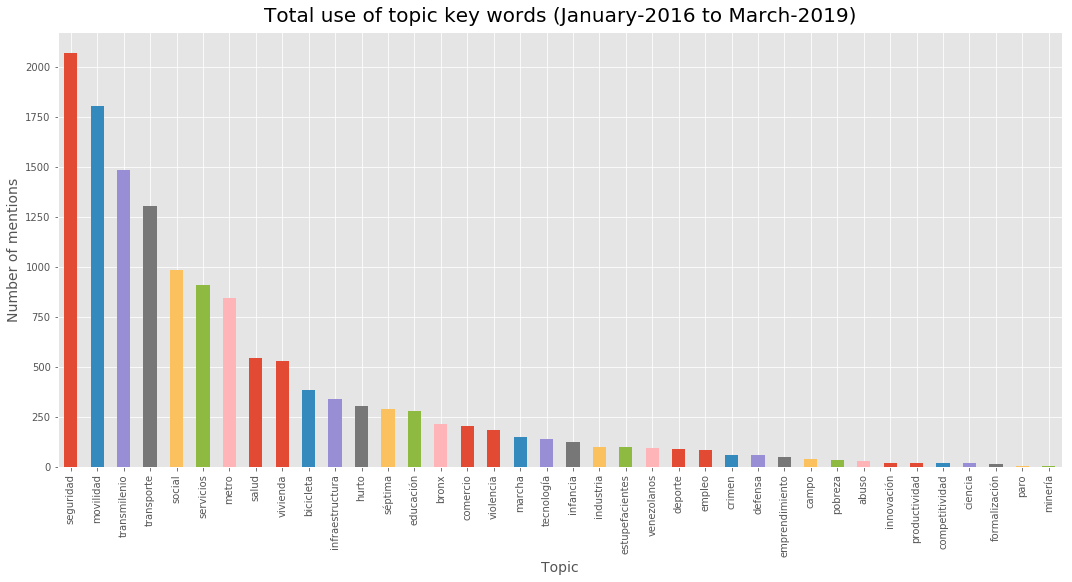

In [329]:
totals_by_topic.plot(kind='bar')

plt.title("Total use of topic key words (January-2016 to March-2019)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of mentions", fontdict={'fontsize': 14})
plt.xlabel("Topic", fontdict={'fontsize': 14})
plt.savefig('topics_total.png')

## Collocations

In [371]:
all_news_text = nltk.Text(all_tokens)
all_news_text.collocations(num = 30)

enrique penalosa; alcaldia mayor; mayor bogota; millones pesos; 571
381; espacio publico; alcalde enrique; lunes viernes; reciba noticias;
381 3000; telefono 571; policia metropolitana; portales paginas; asi
mismo; siganos redes; derechos reservados; redes reciba; 3000 horario;
twitter serviciudadanofacebook; viernes 700; red portales; paginas
sector; jardin botanico; transporte publico; integracion social;
ciudad bolivar; horario atencion; noticias alcalde;
serviciudadanofacebook alcaldia; administracion distrital


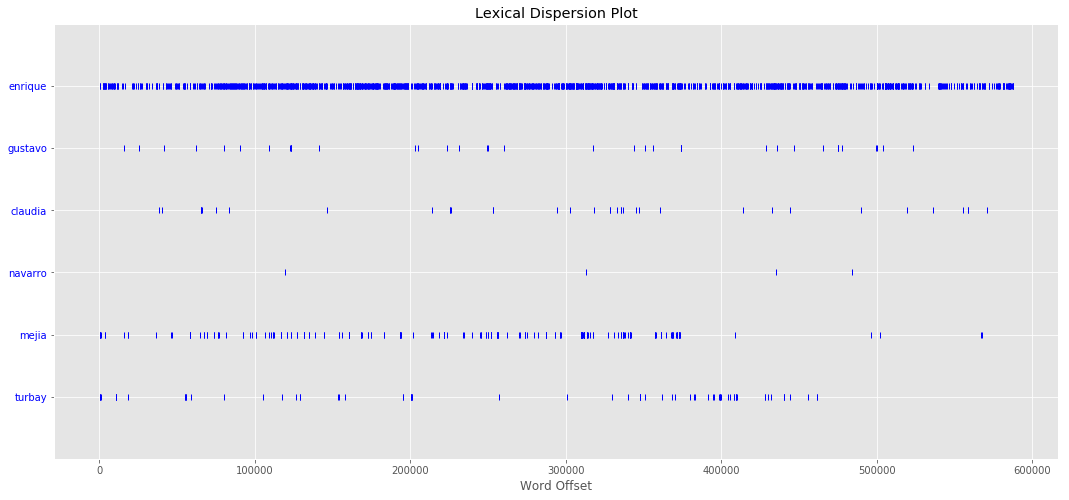

In [372]:
all_news_text.dispersion_plot(['enrique', 'gustavo', 'claudia', 'navarro', 'mejia', 'turbay'])

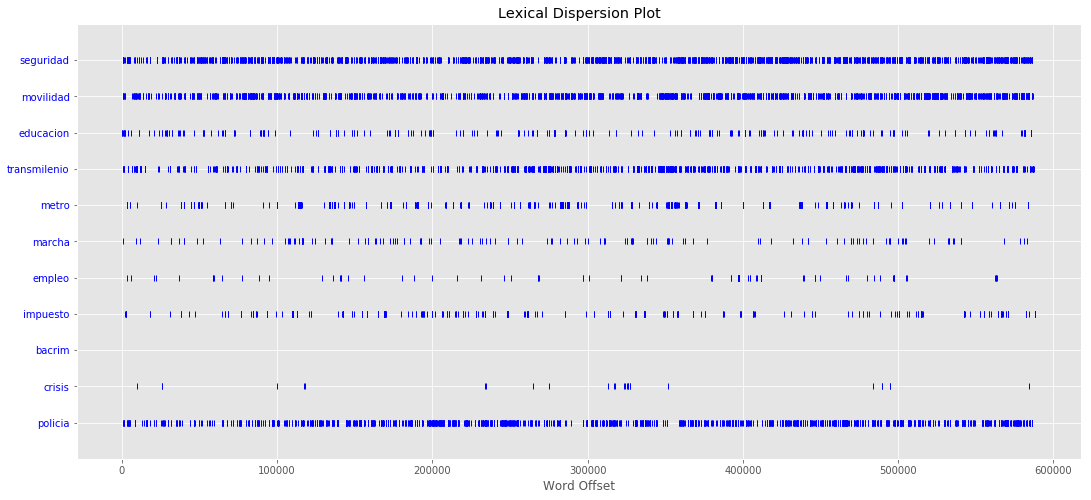

In [373]:
all_news_text.dispersion_plot(['seguridad', 'movilidad', 'educacion', 'transmilenio', 'metro', 'marcha',\
                                  'empleo', 'impuesto', 'bacrim', 'crisis', 'policia'])

## Analisis de redes

In [398]:
#Nuevo data frame

news1 = news.loc[:,["no_accent", "tokens", "no_stopwords", "nltk_Text"]]

#Definimos stopwords y otras palabras para quitar de los textos
stopwords_esp = nltk.corpus.stopwords.words('spanish')
stopwords_esp = [unidecode.unidecode(x) for x in stopwords_esp]

stopwords_esp = stopwords_esp + ["mas", "ano", "tambien", "asi", "ademas", "anos",
                                 "dos", "estan", "traves", "cada", "hacer", "mismo",
                                  "solo", "tener", "hace", "vez","tres"] 
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

news1["no_stop2"] = news1["no_stopwords"].apply(no_stopwords) 

In [402]:
#Funciones para obtener keywords

def get_keywords(tokens):
    '''
    Obtiene las cinco palabras más repetidas del texto
    '''
    return Counter(tokens).most_common(3)

def set_keywords(tokens):
    '''
    Junta a un data frame las palabras más repetidas de cada texto
    '''
    key = get_keywords(tokens)
    x = []
    for pair in key:
        x += [pair[0]]
    return x

news1["keywords"] = news1["no_stop2"].apply(set_keywords)

#Separamos lista de keywords y creamos función para emparejar

keywords = list(news1["keywords"])

def permut(keyword_list):
    orig_dest = []
    for i in range(len(keyword_list)):
        x = list(permutations(keyword_list[i], 2))
        orig_dest += x
    return orig_dest

orig_dest = list(permut(keywords))

In [403]:
#Separar tupla en dos columnas y crear nuevo dataframe

origin, dest = zip(*orig_dest)

nodes = list(origin + dest)
nodes = pd.DataFrame({"node": nodes})
nodes = nodes["node"].unique()
nodes = pd.DataFrame({"node": nodes})
nodes = nodes.reset_index()
nodes.columns = ["index", "node"]
nodes.to_csv("nodes.csv", sep = ",")


edges = pd.DataFrame({"origin": origin, "destiny": dest})

nodes_list = list(nodes["node"])

def source_target(word):
    for i in range(len(nodes_list)):
        if nodes_list[i] == word:
            x = i
    return x
    
edges["Source"] = edges["origin"].apply(source_target)
edges["Target"] = edges["destiny"].apply(source_target)

edges.to_csv("edges.csv", sep = ",")